In [4]:
#import required package
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from sklearn.preprocessing import MinMaxScaler


In [6]:
#convert txt data to csv dataframe
path = "/Users/shenglienlee/Desktop/Work/2023_Fall/Deep_Learning/Project_3/Data/tick_data/0827/TSLA_30min.txt"
TSLA_30 = pd.read_csv(path, delimiter=',')
#add column name
TSLA_30.columns = ['Timestamp','Open','High','Low','Close','Volume']
#save as .csv file
TSLA_30.to_csv("TSLA_30min.csv",index=False)

In [7]:
#read the file
path = "/Users/shenglienlee/Desktop/Work/2023_Fall/Deep_Learning/Project_3/TSLA_30min.csv"
Tick_data = pd.read_csv(path)
Tick_data = Tick_data.sort_values(by='Timestamp')

In [8]:
Tick_data

,Timestamp,Open,High,Low,Close,Volume
0,2010-06-29 11:30:00,3.640,3.644,3.508,3.616,19526455
1,2010-06-29 12:00:00,3.616,3.682,3.610,3.674,6297820
2,2010-06-29 12:30:00,3.674,3.700,3.654,3.674,3690030
3,2010-06-29 13:00:00,3.676,3.758,3.664,3.756,2933845
4,2010-06-29 13:30:00,3.756,3.834,3.726,3.824,5641440
...,...,...,...,...,...,...
74146,2021-08-27 17:30:00,712.300,712.490,712.000,712.010,4230
74147,2021-08-27 18:00:00,712.200,712.200,712.000,712.200,7187
74148,2021-08-27 18:30:00,712.400,712.410,712.100,712.100,2196
74149,2021-08-27 19:00:00,712.300,712.300,712.100,712.240,2120


In [9]:
#Check null value
Tick_data.isnull().sum()

Timestamp    0
Open         0
High         0
Low          0
Close        0
Volume       0
dtype: int64

In [10]:
#Combine data by different time interval
Tick_data['Timestamp'] = pd.to_datetime(Tick_data['Timestamp'])
Tick_data.set_index('Timestamp', inplace=True)
#Hourly
Hourly_Tick_data = Tick_data.resample('H').agg({'Open': 'first',
                                  'High': 'max',
                                  'Low': 'min',
                                  'Close': 'last',
                                  'Volume': 'sum'})
Hourly_Tick_data= Hourly_Tick_data[~(Hourly_Tick_data[['Open', 'High', 'Low', 'Close', 'Volume']].isnull() | (Hourly_Tick_data[['Open', 'High', 'Low', 'Close', 'Volume']] == 0)).all(axis=1)].reset_index()

#Daily
Daily_Tick_data = Tick_data.resample('D').agg({'Open': 'first',
                                  'High': 'max',
                                  'Low': 'min',
                                  'Close': 'last',
                                  'Volume': 'sum'})
Daily_Tick_data = Daily_Tick_data[~(Daily_Tick_data[['Open', 'High', 'Low', 'Close', 'Volume']].isnull() | (Daily_Tick_data[['Open', 'High', 'Low', 'Close', 'Volume']] == 0)).all(axis=1)].reset_index()



#Weekly
Weekly_Tick_data = Tick_data.resample('W').agg({'Open': 'first',
                                  'High': 'max',
                                  'Low': 'min',
                                  'Close': 'last',
                                  'Volume': 'sum'})
Weekly_Tick_data = Weekly_Tick_data[~(Weekly_Tick_data[['Open', 'High', 'Low', 'Close', 'Volume']].isnull() | (Weekly_Tick_data[['Open', 'High', 'Low', 'Close', 'Volume']] == 0)).all(axis=1)].reset_index()

#Monthly
Monthly_Tick_data = Tick_data.resample('M').agg({'Open': 'first',
                                  'High': 'max',
                                  'Low': 'min',
                                  'Close': 'last',
                                  'Volume': 'sum'})
Monthly_Tick_data = Monthly_Tick_data[~(Monthly_Tick_data[['Open', 'High', 'Low', 'Close', 'Volume']].isnull() | (Monthly_Tick_data[['Open', 'High', 'Low', 'Close', 'Volume']] == 0)).all(axis=1)].reset_index()

Tick_data = Tick_data.reset_index()


# Correlation Matrix

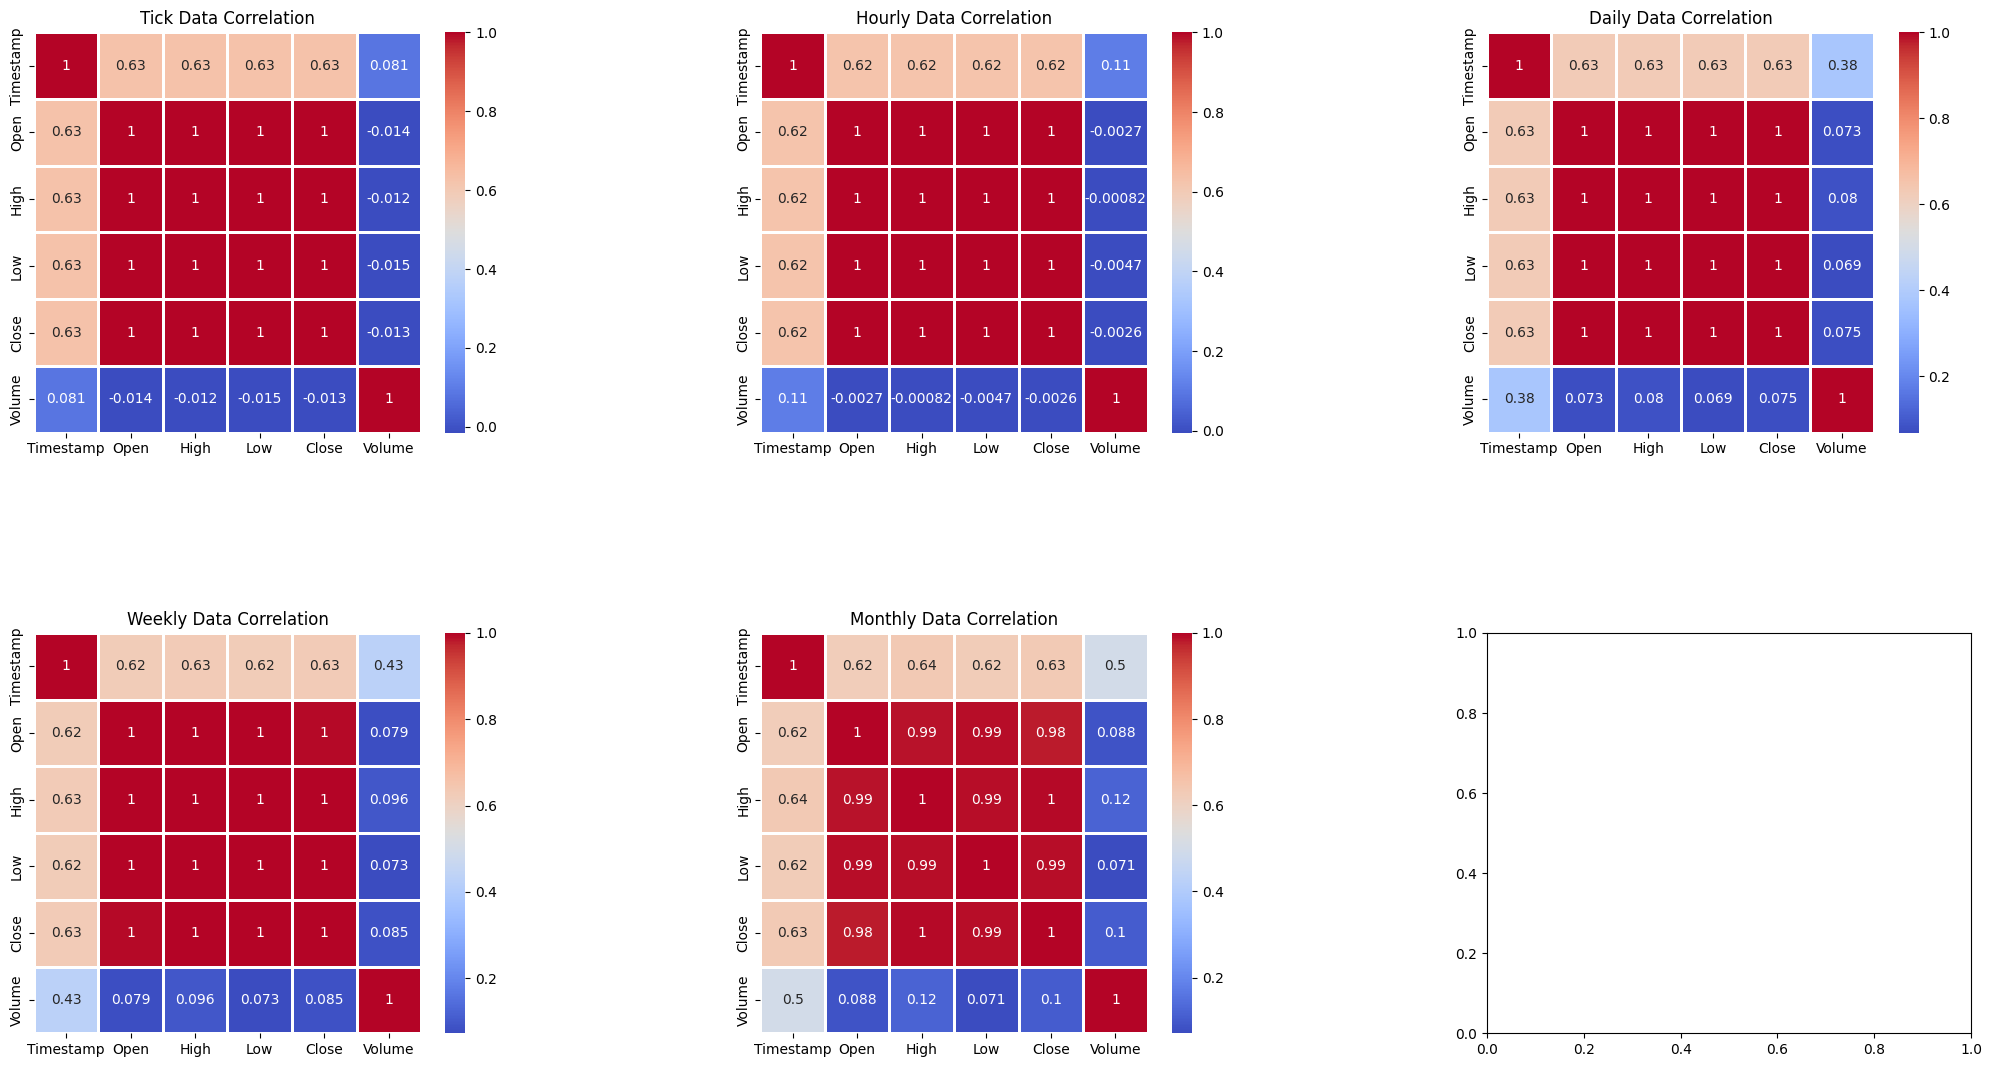

In [7]:
#correlation map
T_correlation_matrix = Tick_data.corr()
H_correlation_matrix = Hourly_Tick_data.corr()
D_correlation_matrix = Daily_Tick_data.corr()
W_correlation_matrix = Weekly_Tick_data.corr()
M_correlation_matrix = Monthly_Tick_data.corr()

# Create a figure and a set of subplots
fig, axs = plt.subplots(2, 3, figsize=(25, 13))  # 2 rows, 2 columns

# Adjust the space between plots
plt.subplots_adjust(hspace=0.5, wspace=0.5)

# Tick Data Heatmap
sb.heatmap(T_correlation_matrix, annot=True, cmap='coolwarm', linewidths=1, ax=axs[0, 0])
axs[0, 0].set_title('Tick Data Correlation')

# Hourly Data Heatmap
sb.heatmap(H_correlation_matrix, annot=True, cmap='coolwarm', linewidths=1, ax=axs[0, 1])
axs[0, 1].set_title('Hourly Data Correlation')

# Daily Data Heatmap
sb.heatmap(D_correlation_matrix, annot=True, cmap='coolwarm', linewidths=1, ax=axs[0, 2])
axs[0, 2].set_title('Daily Data Correlation')

# Weekly Data Heatmap
sb.heatmap(W_correlation_matrix, annot=True, cmap='coolwarm', linewidths=1, ax=axs[1, 0])
axs[1, 0].set_title('Weekly Data Correlation')

# Weekly Data Heatmap
sb.heatmap(M_correlation_matrix, annot=True, cmap='coolwarm', linewidths=1, ax=axs[1, 1])
axs[1, 1].set_title('Monthly Data Correlation')

# Display the plots
plt.show()


# Line Plot

### Close, Voleme, and Return with different timeframe

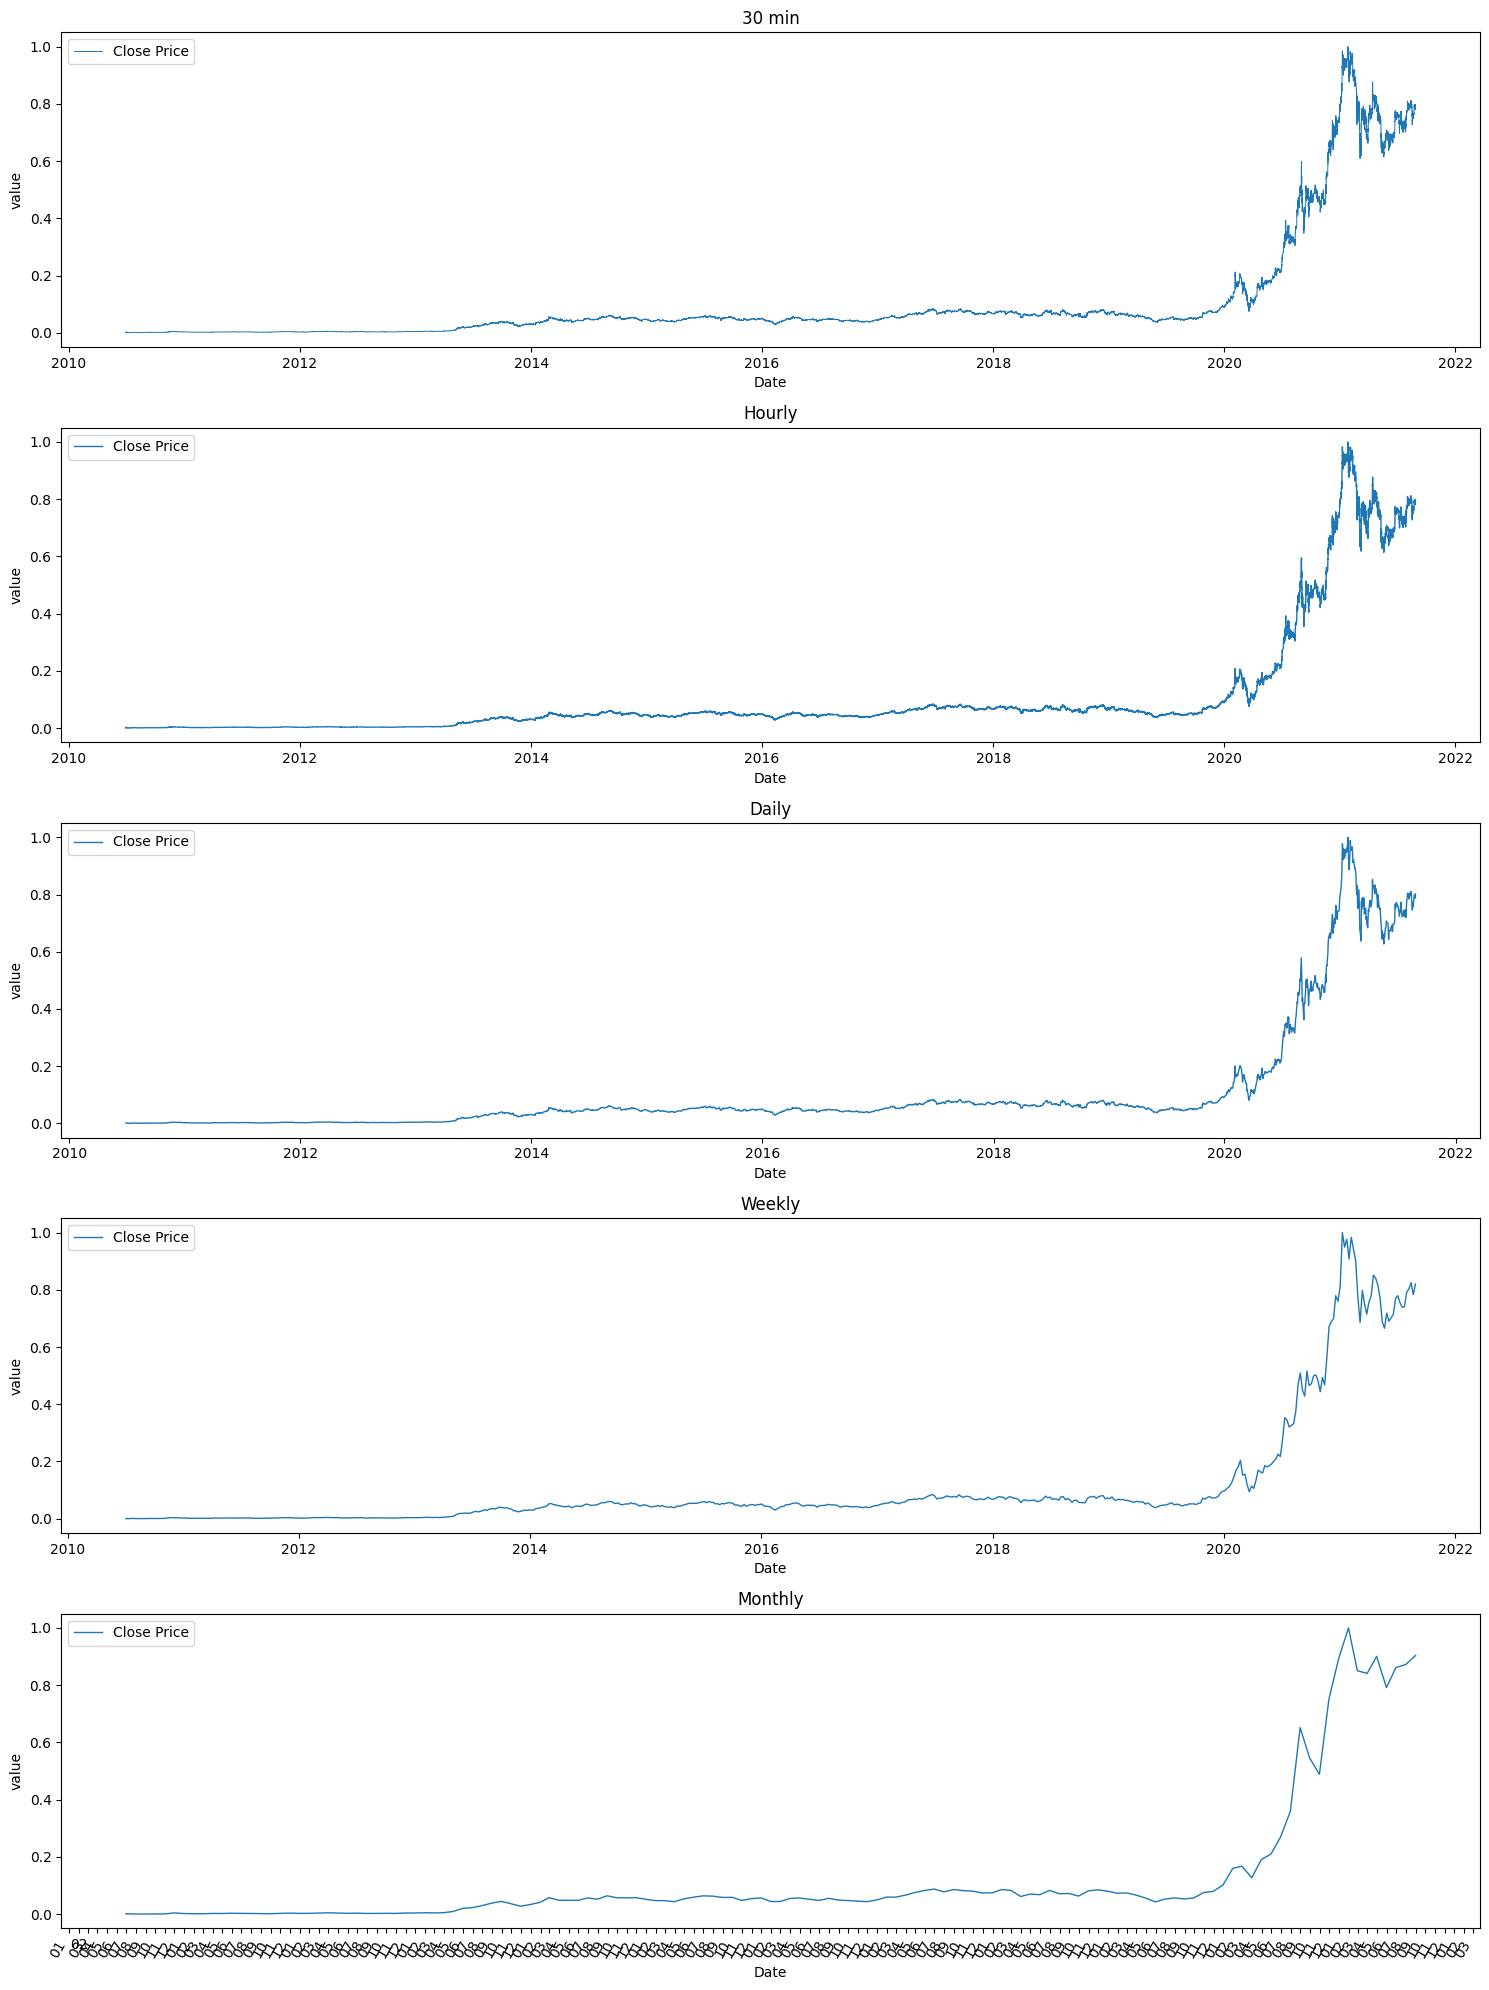

In [8]:

datasets = [Tick_data,Hourly_Tick_data,Daily_Tick_data,Weekly_Tick_data,Monthly_Tick_data]

Normalize_30min_Data = pd.DataFrame()
Normalize_H_Data = pd.DataFrame()
Normalize_D_Data = pd.DataFrame()
Normalize_W_Data = pd.DataFrame()
Normalize_M_Data = pd.DataFrame()
N_datasets = [Normalize_30min_Data, Normalize_H_Data, Normalize_D_Data, Normalize_W_Data,Normalize_M_Data]

#normaize features
scaler = MinMaxScaler()
for d in range(len(datasets)):
    N_datasets[d]['Timestamp'] = datasets[d].Timestamp
    N_datasets[d][['Close']] = scaler.fit_transform(datasets[d][['Close']])

fig, axs = plt.subplots(5, 1, figsize=(15, 20))

axs[0].plot(Normalize_30min_Data['Timestamp'],Normalize_30min_Data['Close'], label='Close Price',linewidth=0.7)
axs[0].set_title('30 min')
axs[0].set_xlabel('Date')
axs[0].set_ylabel('value')
axs[0].legend()

axs[1].plot(Normalize_H_Data['Timestamp'],Normalize_H_Data['Close'], label='Close Price',linewidth=1)
axs[1].set_title('Hourly')
axs[1].set_xlabel('Date')
axs[1].set_ylabel('value')
axs[1].legend()

axs[2].plot(Normalize_D_Data['Timestamp'],Normalize_D_Data['Close'], label='Close Price',linewidth=1)
axs[2].set_title('Daily')
axs[2].set_xlabel('Date')
axs[2].set_ylabel('value')
axs[2].legend()

axs[3].plot(Normalize_W_Data['Timestamp'],Normalize_W_Data['Close'], label='Close Price',linewidth=1)
axs[3].set_title('Weekly')
axs[3].set_xlabel('Date')
axs[3].set_ylabel('value')
axs[3].legend()

# Set the locator for the x-axis to pick every month
axs[4].xaxis.set_major_locator(mdates.MonthLocator())

# Specify the format - this line sets the formatter to show 'year-month'
axs[4].xaxis.set_major_formatter(mdates.DateFormatter('%m'))

# You may want to rotate the dates on the x-axis to fit them better
plt.setp(axs[4].get_xticklabels(), rotation=60, ha='right')
axs[4].plot(Normalize_M_Data['Timestamp'],Normalize_M_Data['Close'], label='Close Price',linewidth=1)
axs[4].set_title('Monthly')
axs[4].set_xlabel('Date')
axs[4].set_ylabel('value')
axs[4].legend()

# Adjust the layout
plt.tight_layout()

# Display the plots
plt.show()

# Mia Data

In [9]:
Tick_data = pd.read_csv("/Users/shenglienlee/Desktop/Work/2023_Fall/Deep_Learning/Project_3/combined_30min_df.csv")
Tick_data.rename(columns={'30min_truncated_datetime': 'Timestamp'}, inplace=True)
Hourly_Tick_data = pd.read_csv("/Users/shenglienlee/Desktop/Work/2023_Fall/Deep_Learning/Project_3/combined_Hourly_df.csv")
Hourly_Tick_data.rename(columns={'hourly_truncated_datetime': 'Timestamp'}, inplace=True)
Daily_Tick_data = pd.read_csv("/Users/shenglienlee/Desktop/Work/2023_Fall/Deep_Learning/Project_3/combined_daily_df.csv")
Daily_Tick_data.rename(columns={'date': 'Timestamp'}, inplace=True)
Weekly_Tick_data = pd.read_csv("/Users/shenglienlee/Desktop/Work/2023_Fall/Deep_Learning/Project_3/combined_weekly_df.csv")
Weekly_Tick_data.rename(columns={'week_start_date': 'Timestamp'}, inplace=True)
Monthly_Tick_data = pd.read_csv("/Users/shenglienlee/Desktop/Work/2023_Fall/Deep_Learning/Project_3/combined_monthly_df.csv")
Monthly_Tick_data.rename(columns={'month_end_date': 'Timestamp'}, inplace=True)

# Model

## Prophet

### Timestamp predict close price

#### Monthly

In [10]:
from prophet import Prophet
import pandas as pd
dataset = Monthly_Tick_data
# Prepare the data
dataset['Timestamp'] =pd.to_datetime(dataset['Timestamp'])
mask_Train = (dataset['Timestamp'] <= '2017-12-31')
mask_Test = (dataset['Timestamp'] > '2017-12-31') & (dataset['Timestamp'] <= '2018-12-31')
dataset_test = dataset.loc[mask_Test].reset_index(drop=True)
dataset = dataset.loc[mask_Train].reset_index(drop=True)
prophet_df = pd.DataFrame()
prophet_df['ds'] = pd.to_datetime(dataset['Timestamp'])
prophet_df['y'] = dataset['Close']
#prophet_df['Close'] = dataset['Close']


# Instantiate and fit the model
#model = Prophet(daily_seasonality=True)  # Adjust seasonality if needed
model = Prophet()
#model.add_regressor('Close')
model.fit(prophet_df)


# Make future predictions - here, predicting for 365 days ahead
future = model.make_future_dataframe(periods=12,freq='M')
#future['Close'] = prophet_df['Close'].mean()

forecast = model.predict(future)


/Users/shenglienlee/anaconda3/envs/DL_Project3/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
21:26:24 - cmdstanpy - INFO - Chain [1] start processing
21:26:24 - cmdstanpy - INFO - Chain [1] done processing


In [11]:
forecast_test = forecast[(forecast['ds'] > '2017-12-31') & (forecast['ds'] <= '2018-12-31')]  
forecast_test = forecast_test[['ds','yhat']].reset_index( drop=True)
forecast_test.rename(columns={'ds': 'Timestamp'}, inplace=True)
test = dataset_test[['Timestamp','Close']]
df_MSE = forecast_test.merge(test, on='Timestamp', how='inner')
#df_MSE

In [12]:
from sklearn.metrics import mean_squared_error


# Ensure that the forecast and the actuals have the same length
assert len(df_MSE['Close']) == len(df_MSE ['yhat'])

# Calculate MSE
mse = mean_squared_error(df_MSE ['Close'], df_MSE ['yhat'])
print("Mean Squared Error: ", mse)

Mean Squared Error:  141.75515845560662


/Users/shenglienlee/anaconda3/envs/DL_Project3/lib/python3.9/site-packages/prophet/plot.py:72: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
/Users/shenglienlee/anaconda3/envs/DL_Project3/lib/python3.9/site-packages/prophet/plot.py:73: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  ax.plot(m.history['ds'].dt.to_pydatetime(), m.history['y'], 'k.',
/Users/shenglienlee/anaconda3/envs/DL_Project3/lib/python3.9/site-packages/prophet/plot.py:228: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Serie

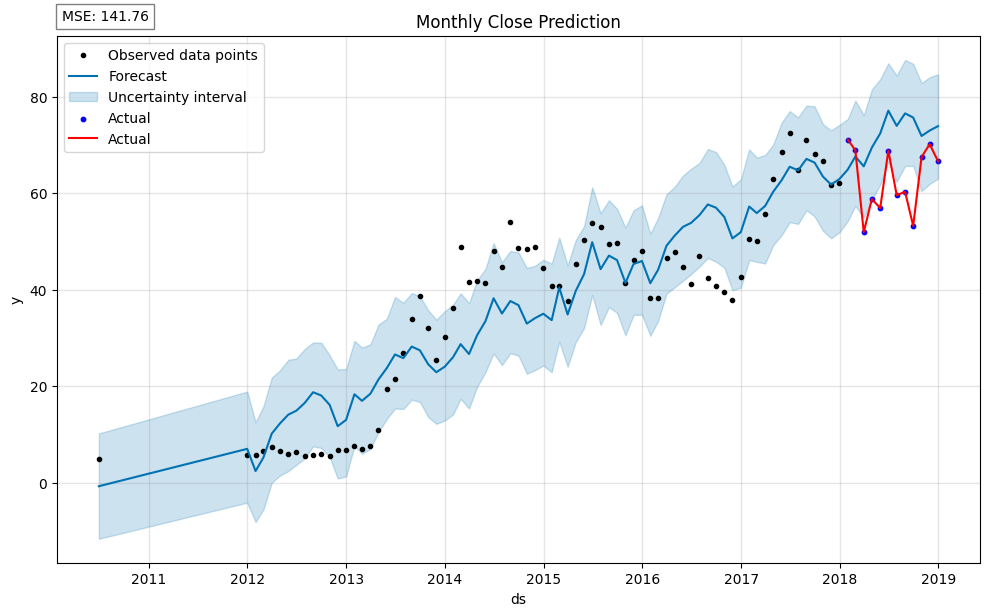

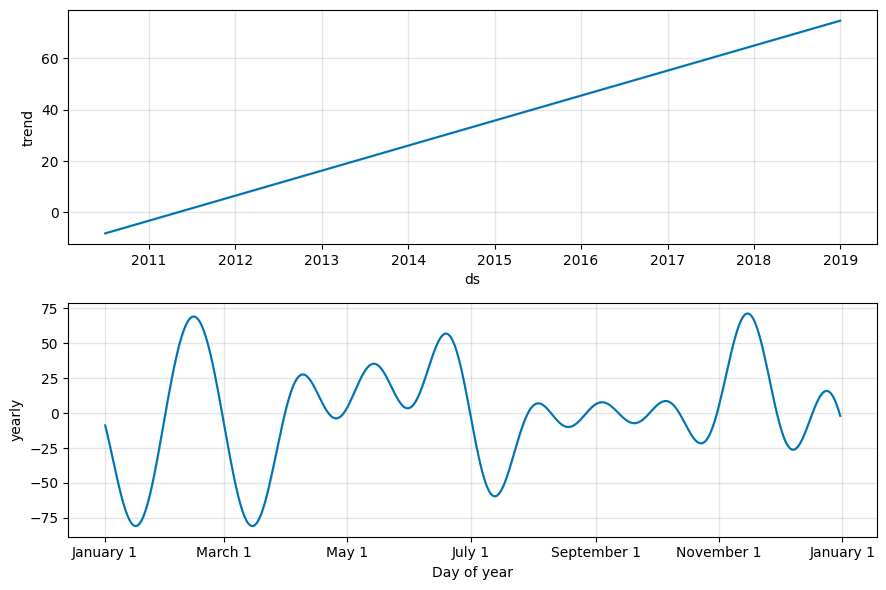

In [13]:
from prophet.plot import plot_forecast_component

fig1 = model.plot(forecast)
ax1 = fig1.gca()  # Get the current axis of the plot to overlay actual data points
ax1.scatter(df_MSE['Timestamp'], df_MSE['Close'], color='b', label='Actual',s=10)  # Overlay actual data points in red
ax1.plot(df_MSE['Timestamp'], df_MSE['Close'], color='r', label='Actual')  # Overlay actual data points in red

ax1.legend()
ax1.set_title('Monthly Close Prediction')

ax1.text(0.005, 1.03, f'MSE: {mse:.2f}', transform=ax1.transAxes, 
         bbox=dict(facecolor='white', alpha=0.5))

fig2 = model.plot_components(forecast)


### Monthly + tweet

In [14]:
from prophet import Prophet
import pandas as pd
dataset = Monthly_Tick_data
# Prepare the data
dataset['Timestamp'] =pd.to_datetime(dataset['Timestamp'])
mask_Train = (dataset['Timestamp'] <= '2017-12-31')
mask_Test = (dataset['Timestamp'] > '2017-12-31') & (dataset['Timestamp'] <= '2018-12-31')
dataset_test = dataset.loc[mask_Test].reset_index(drop=True)
dataset = dataset.loc[mask_Train].reset_index(drop=True)
prophet_df = pd.DataFrame()
prophet_df['ds'] = pd.to_datetime(dataset['Timestamp'])
prophet_df['y'] = dataset['Close']
prophet_df['net_sentiment'] = dataset['net_sentiment']
prophet_df['num_of_likes'] = dataset['num_of_likes']
#prophet_df['Close'] = dataset['Close']


# Instantiate and fit the model
#model = Prophet(daily_seasonality=True)  # Adjust seasonality if needed
model = Prophet()
#model.add_regressor('Close')
model.add_regressor('net_sentiment')
model.add_regressor('num_of_likes')
model.fit(prophet_df)


# Make future predictions - here, predicting for 365 days ahead
total_data = pd.concat([dataset, dataset_test], ignore_index=True)
future = model.make_future_dataframe(periods=12,freq='M')
future['net_sentiment'] = total_data['net_sentiment']
future['num_of_likes'] = total_data['num_of_likes']

#future['Close'] = prophet_df['Close'].mean()

forecast = model.predict(future)


21:26:25 - cmdstanpy - INFO - Chain [1] start processing


21:26:25 - cmdstanpy - INFO - Chain [1] done processing


In [15]:
forecast_test = forecast[(forecast['ds'] > '2017-12-31') & (forecast['ds'] <= '2018-12-31')]  
forecast_test = forecast_test[['ds','yhat']].reset_index( drop=True)
forecast_test.rename(columns={'ds': 'Timestamp'}, inplace=True)
test = dataset_test[['Timestamp','Close']]
df_MSE = forecast_test.merge(test, on='Timestamp', how='inner')
#df_MSE

In [16]:
from sklearn.metrics import mean_squared_error


# Ensure that the forecast and the actuals have the same length
assert len(df_MSE['Close']) == len(df_MSE ['yhat'])

# Calculate MSE
mse = mean_squared_error(df_MSE ['Close'], df_MSE ['yhat'])
print("Mean Squared Error: ", mse)

Mean Squared Error:  108.8904320587049


/Users/shenglienlee/anaconda3/envs/DL_Project3/lib/python3.9/site-packages/prophet/plot.py:72: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
/Users/shenglienlee/anaconda3/envs/DL_Project3/lib/python3.9/site-packages/prophet/plot.py:73: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  ax.plot(m.history['ds'].dt.to_pydatetime(), m.history['y'], 'k.',
/Users/shenglienlee/anaconda3/envs/DL_Project3/lib/python3.9/site-packages/prophet/plot.py:228: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Serie

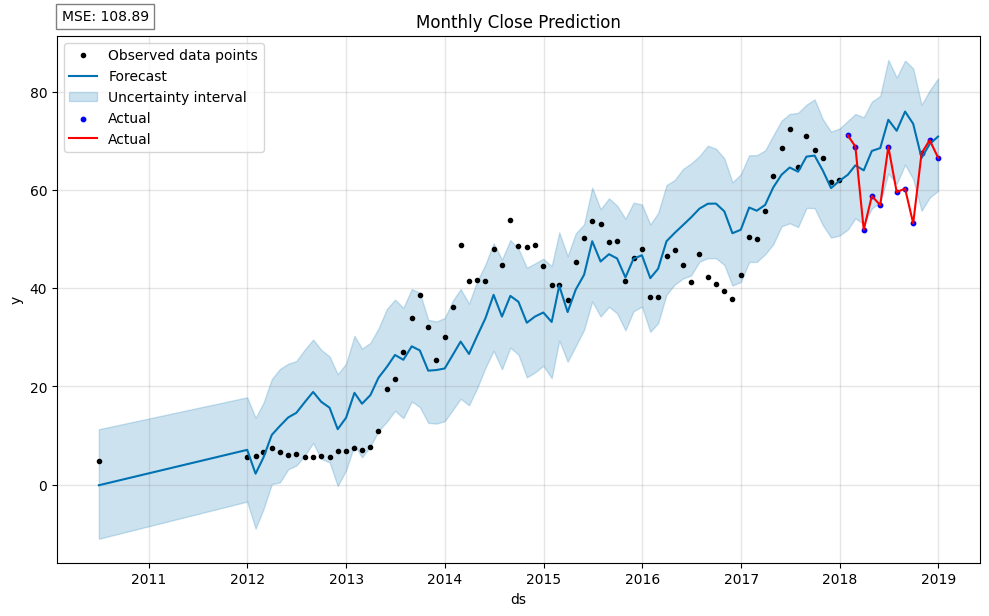

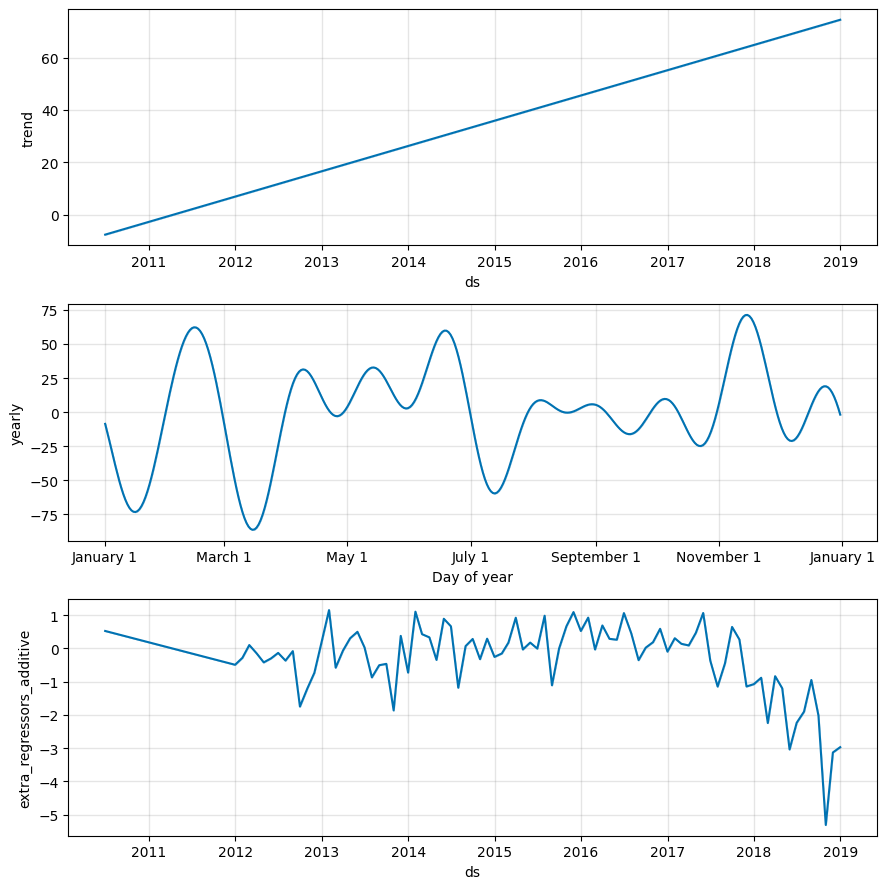

In [17]:
from prophet.plot import plot_forecast_component

fig1 = model.plot(forecast)
ax1 = fig1.gca()  # Get the current axis of the plot to overlay actual data points
ax1.scatter(df_MSE['Timestamp'], df_MSE['Close'], color='b', label='Actual',s=10)  # Overlay actual data points in red
ax1.plot(df_MSE['Timestamp'], df_MSE['Close'], color='r', label='Actual')  # Overlay actual data points in red
ax1.text(0.005, 1.03, f'MSE: {mse:.2f}', transform=ax1.transAxes, 
         bbox=dict(facecolor='white', alpha=0.5))

ax1.legend()
ax1.set_title('Monthly Close Prediction')

fig2 = model.plot_components(forecast)

### Timestamp & Volume predict Return

## LSTM

In [18]:
import numpy as np
import pandas as pd

import os
import matplotlib.pyplot as plt
import pandas_datareader as web
import datetime as dt

import tensorflow as tf
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, LSTM
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
from sklearn.model_selection import train_test_split

### 30 min data

In [19]:
#train test split

#Timeframe
dataset = Tick_data
# Prepare the data
dataset['Timestamp'] =pd.to_datetime(dataset['Timestamp'])
mask_Train = (dataset['Timestamp'] <= '2017-12-31')
mask_Test = (dataset['Timestamp'] >= '2017-12-31') & (dataset['Timestamp'] < '2018-12-31')
train = dataset.loc[mask_Train].reset_index(drop=True)
test = dataset.loc[mask_Test].reset_index(drop=True)

In [20]:
# Normalize train data
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(train['Close'].values.reshape(-1,1))

In [21]:
# Set the number of days used for prediction
#***********************
prediction_interval= len(test)

# Initialize empty lists for training data input and output
x_train = []
y_train = []

# Iterate through the scaled data, starting from the prediction_days index
for x in range(prediction_interval, len(scaled_data)):
    # Append the previous 'prediction_days' values to x_train
    x_train.append(scaled_data[x - prediction_interval:x, 0])
    # Append the current value to y_train
    y_train.append(scaled_data[x, 0])

# Convert the x_train and y_train lists to numpy arrays
x_train = np.array(x_train)
y_train = np.array(y_train)

# Reshape x_train to a 3D array with the appropriate dimensions for the LSTM model
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))

In [22]:
def LSTM_model():
    """
    Create and configure an LSTM model for stock price prediction.

    :return: The configured LSTM model (keras.Sequential)
    """

    # Initialize a sequential model
    model = Sequential()

    # Add the first LSTM layer with 50 units, input shape, and return sequences
    model.add(LSTM(units=50, return_sequences=True, input_shape=(x_train.shape[1], 1)))
    # Add dropout to prevent overfitting
    model.add(Dropout(0.2))

    # Add a second LSTM layer with 50 units and return sequences
    model.add(LSTM(units=50, return_sequences=True))
    # Add dropout to prevent overfitting
    model.add(Dropout(0.2))

    # Add a third LSTM layer with 50 units
    model.add(LSTM(units=50))
    # Add dropout to prevent overfitting
    model.add(Dropout(0.2))

    # Add a dense output layer with one unit
    model.add(Dense(units=1))

    return model

In [23]:

model = LSTM_model()
model.summary()
model.compile(
    optimizer='adam',
    loss='mean_squared_error'
)
# Define callbacks

# Save weights only for best model
checkpointer = ModelCheckpoint(
    filepath = '/Users/shenglienlee/Desktop/Work/2023_Fall/Deep_Learning/Project_3/Model',
    filename='{epoch}-{val_loss:.2f}-{other_metric:.2f}',
    verbose = 2,
    save_best_only = True
)

model.fit(
    x_train,
    y_train,
    epochs=25,
    batch_size = 32,
    callbacks = [checkpointer]
)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 492, 50)           10400     
                                                                 
 dropout (Dropout)           (None, 492, 50)           0         
                                                                 
 lstm_1 (LSTM)               (None, 492, 50)           20200     
                                                                 
 dropout_1 (Dropout)         (None, 492, 50)           0         
                                                                 
 lstm_2 (LSTM)               (None, 50)                20200     
                                                                 
 dropout_2 (Dropout)         (None, 50)                0         
                                                                 
 dense (Dense)               (None, 1)                 5

In [24]:
# Extract the actual closing prices from the test data
actual_prices = test['Close'].values

In [25]:
# Initialize an empty list for test data input
x_test = []

# # Iterate through the model inputs, starting from the prediction_days index
# for x in range(prediction_interval, len(model_inputs)):
#     # Append the previous 'prediction_days' values to x_test
#     x_test.append(model_inputs[x-prediction_interval:x, 0])

#x_test is a numpy array with shape 60*1
#initail x_test shoould be last 60 smaple in training dataset
x_test = x_train[-1]
# Convert the x_test list to a numpy array
x_test = np.array(x_test)
# Reshape x_test to a 3D array with the appropriate dimensions for the LSTM model
x_test = np.reshape(x_test, (1, x_test.shape[0], 1))

All_predicted_prices = []
#predict a value
for i in range(len(test)):
    predicted_price = model.predict(x_test)
    #x_test = x_test delete first element +predicted_prices
    #       shift all the data one ahead
    #       add  predicted_prices as last value
    x_test =x_test[:, 1:, :]
    # Generate price predictions using the LSTM model
    predicted_price = np.array([[[predicted_price[0][0]]]])
    x_test = np.append(x_test, predicted_price, axis=1)
    All_predicted_prices.append(predicted_price)

# Invert the scaling applied to the predicted prices to obtain actual values
All_predicted_prices = np.array(All_predicted_prices)
All_predicted_prices = All_predicted_prices.reshape(All_predicted_prices.shape[0],1)
All_predicted_prices = scaler.inverse_transform(All_predicted_prices)



1/1 [==============================] - 0s 32ms/step


Mean Squared Error: 97.6315775743207


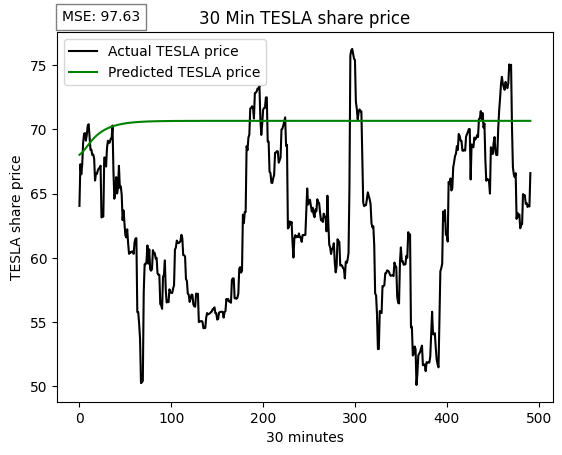

In [26]:
from sklearn.metrics import mean_squared_error

# Calculate Mean Squared Error (MSE) between the actual prices and the predicted prices
mse = mean_squared_error(actual_prices, All_predicted_prices)
print("Mean Squared Error:", mse)

#Plot the Graph
COMPANY = "TESLA"
# Plot the actual prices using a black line
plt.plot(actual_prices, color='black', label=f"Actual {COMPANY} price")

# Plot the predicted prices using a green line
plt.plot(All_predicted_prices, color='green', label=f"Predicted {COMPANY} price")

# Set the title of the plot using the company name
plt.title("30 Min TESLA share price")

# Set the x-axis label as 'time'
plt.xlabel("30 minutes")

# Set the y-axis label using the company name
plt.ylabel(f"{COMPANY} share price")

plt.text(x=0.01, y=1.03, s=f"MSE: {mse:.2f}", transform=plt.gca().transAxes, 
         bbox=dict(facecolor='white', alpha=0.5))

# Display a legend to differentiate the actual and predicted prices
plt.legend()

# Show the plot on the screen
plt.show()


In [27]:
#save model
#model.save('/Users/shenglienlee/Desktop/Work/2023_Fall/Deep_Learning/Project_3/Model/LSTM_1')

### Hourly

In [28]:
#train test split

#Timeframe
dataset = Hourly_Tick_data
# Prepare the data
dataset['Timestamp'] =pd.to_datetime(dataset['Timestamp'])
mask_Train = (dataset['Timestamp'] <= '2017-12-31')
mask_Test = (dataset['Timestamp'] >= '2017-12-31') & (dataset['Timestamp'] < '2018-12-31')
train = dataset.loc[mask_Train].reset_index(drop=True)
test = dataset.loc[mask_Test].reset_index(drop=True)

# Normalize train data
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(train['Close'].values.reshape(-1,1))

# Set the number of days used for prediction
#***********************
prediction_interval= len(test)

# Initialize empty lists for training data input and output
x_train = []
y_train = []

# Iterate through the scaled data, starting from the prediction_days index
for x in range(prediction_interval, len(scaled_data)):
    # Append the previous 'prediction_days' values to x_train
    x_train.append(scaled_data[x - prediction_interval:x, 0])
    # Append the current value to y_train
    y_train.append(scaled_data[x, 0])

# Convert the x_train and y_train lists to numpy arrays
x_train = np.array(x_train)
y_train = np.array(y_train)

# Reshape x_train to a 3D array with the appropriate dimensions for the LSTM model
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))

def LSTM_model():
    """
    Create and configure an LSTM model for stock price prediction.

    :return: The configured LSTM model (keras.Sequential)
    """

    # Initialize a sequential model
    model = Sequential()

    # Add the first LSTM layer with 50 units, input shape, and return sequences
    model.add(LSTM(units=50, return_sequences=True, input_shape=(x_train.shape[1], 1)))
    # Add dropout to prevent overfitting
    model.add(Dropout(0.2))

    # Add a second LSTM layer with 50 units and return sequences
    model.add(LSTM(units=50, return_sequences=True))
    # Add dropout to prevent overfitting
    model.add(Dropout(0.2))

    # Add a third LSTM layer with 50 units
    model.add(LSTM(units=50))
    # Add dropout to prevent overfitting
    model.add(Dropout(0.2))

    # Add a dense output layer with one unit
    model.add(Dense(units=1))

    return model

model = LSTM_model()
model.summary()
model.compile(
    optimizer='adam',
    loss='mean_squared_error'
)

# Define callbacks

# Save weights only for best model
checkpointer = ModelCheckpoint(
    filepath = '/Users/shenglienlee/Desktop/Work/2023_Fall/Deep_Learning/Project_3/Model',
    filename='{epoch}-{val_loss:.2f}-{other_metric:.2f}',
    verbose = 2,
    save_best_only = True
)

model.fit(
    x_train,
    y_train,
    epochs=25,
    batch_size = 32,
    callbacks = [checkpointer]
)

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_3 (LSTM)               (None, 423, 50)           10400     
                                                                 
 dropout_3 (Dropout)         (None, 423, 50)           0         
                                                                 
 lstm_4 (LSTM)               (None, 423, 50)           20200     
                                                                 
 dropout_4 (Dropout)         (None, 423, 50)           0         
                                                                 
 lstm_5 (LSTM)               (None, 50)                20200     
                                                                 
 dropout_5 (Dropout)         (None, 50)                0         
                                                                 
 dense_1 (Dense)             (None, 1)                

In [29]:
# Extract the actual closing prices from the test data
actual_prices = test['Close'].values
# Initialize an empty list for test data input
x_test = []

# # Iterate through the model inputs, starting from the prediction_days index
# for x in range(prediction_interval, len(model_inputs)):
#     # Append the previous 'prediction_days' values to x_test
#     x_test.append(model_inputs[x-prediction_interval:x, 0])

#x_test is a numpy array with shape 60*1
#initail x_test shoould be last 60 smaple in training dataset
x_test = x_train[-1]
# Convert the x_test list to a numpy array
x_test = np.array(x_test)
# Reshape x_test to a 3D array with the appropriate dimensions for the LSTM model
x_test = np.reshape(x_test, (1, x_test.shape[0], 1))

All_predicted_prices = []
#predict a value
for i in range(len(test)):
    predicted_price = model.predict(x_test)
    #x_test = x_test delete first element +predicted_prices
    #       shift all the data one ahead
    #       add  predicted_prices as last value
    x_test =x_test[:, 1:, :]
    # Generate price predictions using the LSTM model
    predicted_price = np.array([[[predicted_price[0][0]]]])
    x_test = np.append(x_test, predicted_price, axis=1)
    All_predicted_prices.append(predicted_price)

# Invert the scaling applied to the predicted prices to obtain actual values
All_predicted_prices = np.array(All_predicted_prices)
All_predicted_prices = All_predicted_prices.reshape(All_predicted_prices.shape[0],1)
All_predicted_prices = scaler.inverse_transform(All_predicted_prices)



1/1 [==============================] - 0s 27ms/step


Mean Squared Error: 95.87056909204976


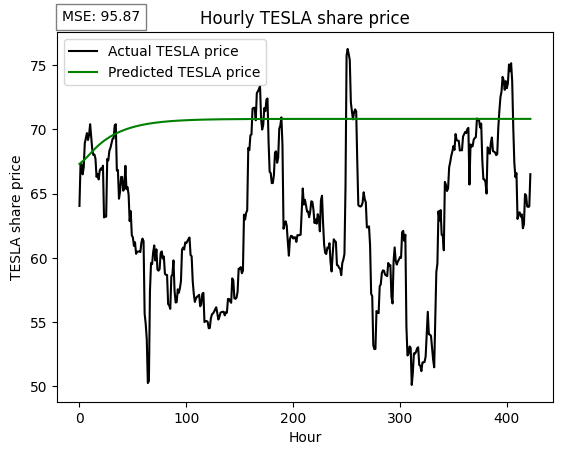

In [30]:
from sklearn.metrics import mean_squared_error

# Calculate Mean Squared Error (MSE) between the actual prices and the predicted prices
mse = mean_squared_error(actual_prices, All_predicted_prices)
print("Mean Squared Error:", mse)

#Plot the Graph
COMPANY = "TESLA"
# Plot the actual prices using a black line
plt.plot(actual_prices, color='black', label=f"Actual {COMPANY} price")

# Plot the predicted prices using a green line
plt.plot(All_predicted_prices, color='green', label=f"Predicted {COMPANY} price")

# Set the title of the plot using the company name
plt.title("Hourly TESLA share price")

# Set the x-axis label as 'time'
plt.xlabel("Hour")

# Set the y-axis label using the company name
plt.ylabel(f"{COMPANY} share price")

plt.text(x=0.01, y=1.03, s=f"MSE: {mse:.2f}", transform=plt.gca().transAxes, 
         bbox=dict(facecolor='white', alpha=0.5))

# Display a legend to differentiate the actual and predicted prices
plt.legend()

# Show the plot on the screen
plt.show()


### Daily

In [31]:
#train test split

#Timeframe
dataset = Daily_Tick_data
# Prepare the data
dataset['Timestamp'] =pd.to_datetime(dataset['Timestamp'])
mask_Train = (dataset['Timestamp'] <= '2017-12-31')
mask_Test = (dataset['Timestamp'] >= '2017-12-31') & (dataset['Timestamp'] < '2018-12-31')
train = dataset.loc[mask_Train].reset_index(drop=True)
test = dataset.loc[mask_Test].reset_index(drop=True)

# Normalize train data
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(train['Close'].values.reshape(-1,1))

# Set the number of days used for prediction
#***********************
prediction_interval= len(test)

# Initialize empty lists for training data input and output
x_train = []
y_train = []

# Iterate through the scaled data, starting from the prediction_days index
for x in range(prediction_interval, len(scaled_data)):
    # Append the previous 'prediction_days' values to x_train
    x_train.append(scaled_data[x - prediction_interval:x, 0])
    # Append the current value to y_train
    y_train.append(scaled_data[x, 0])

# Convert the x_train and y_train lists to numpy arrays
x_train = np.array(x_train)
y_train = np.array(y_train)

# Reshape x_train to a 3D array with the appropriate dimensions for the LSTM model
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))

def LSTM_model():
    """
    Create and configure an LSTM model for stock price prediction.

    :return: The configured LSTM model (keras.Sequential)
    """

    # Initialize a sequential model
    model = Sequential()

    # Add the first LSTM layer with 50 units, input shape, and return sequences
    model.add(LSTM(units=50, return_sequences=True, input_shape=(x_train.shape[1], 1)))
    # Add dropout to prevent overfitting
    model.add(Dropout(0.2))

    # Add a second LSTM layer with 50 units and return sequences
    model.add(LSTM(units=50, return_sequences=True))
    # Add dropout to prevent overfitting
    model.add(Dropout(0.2))

    # Add a third LSTM layer with 50 units
    model.add(LSTM(units=50))
    # Add dropout to prevent overfitting
    model.add(Dropout(0.2))

    # Add a dense output layer with one unit
    model.add(Dense(units=1))

    return model

model = LSTM_model()
model.summary()
model.compile(
    optimizer='adam',
    loss='mean_squared_error'
)

# Define callbacks

# Save weights only for best model
checkpointer = ModelCheckpoint(
    filepath = '/Users/shenglienlee/Desktop/Work/2023_Fall/Deep_Learning/Project_3/Model',
    filename='{epoch}-{val_loss:.2f}-{other_metric:.2f}',
    verbose = 2,
    save_best_only = True
)

model.fit(
    x_train,
    y_train,
    epochs=25,
    batch_size = 32,
    callbacks = [checkpointer]
)

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_6 (LSTM)               (None, 205, 50)           10400     
                                                                 
 dropout_6 (Dropout)         (None, 205, 50)           0         
                                                                 
 lstm_7 (LSTM)               (None, 205, 50)           20200     
                                                                 
 dropout_7 (Dropout)         (None, 205, 50)           0         
                                                                 
 lstm_8 (LSTM)               (None, 50)                20200     
                                                                 
 dropout_8 (Dropout)         (None, 50)                0         
                                                                 
 dense_2 (Dense)             (None, 1)                

In [32]:
# Extract the actual closing prices from the test data
actual_prices = test['Close'].values
# Initialize an empty list for test data input
x_test = []

# # Iterate through the model inputs, starting from the prediction_days index
# for x in range(prediction_interval, len(model_inputs)):
#     # Append the previous 'prediction_days' values to x_test
#     x_test.append(model_inputs[x-prediction_interval:x, 0])

#x_test is a numpy array with shape 60*1
#initail x_test shoould be last 60 smaple in training dataset
x_test = x_train[-1]
# Convert the x_test list to a numpy array
x_test = np.array(x_test)
# Reshape x_test to a 3D array with the appropriate dimensions for the LSTM model
x_test = np.reshape(x_test, (1, x_test.shape[0], 1))

All_predicted_prices = []
#predict a value
for i in range(len(test)):
    predicted_price = model.predict(x_test)
    #x_test = x_test delete first element +predicted_prices
    #       shift all the data one ahead
    #       add  predicted_prices as last value
    x_test =x_test[:, 1:, :]
    # Generate price predictions using the LSTM model
    predicted_price = np.array([[[predicted_price[0][0]]]])
    x_test = np.append(x_test, predicted_price, axis=1)
    All_predicted_prices.append(predicted_price)

# Invert the scaling applied to the predicted prices to obtain actual values
All_predicted_prices = np.array(All_predicted_prices)
All_predicted_prices = All_predicted_prices.reshape(All_predicted_prices.shape[0],1)
All_predicted_prices = scaler.inverse_transform(All_predicted_prices)



1/1 [==============================] - 0s 19ms/step


In [33]:
x_test.shape

(1, 205, 1)

Mean Squared Error: 53.88612442501871


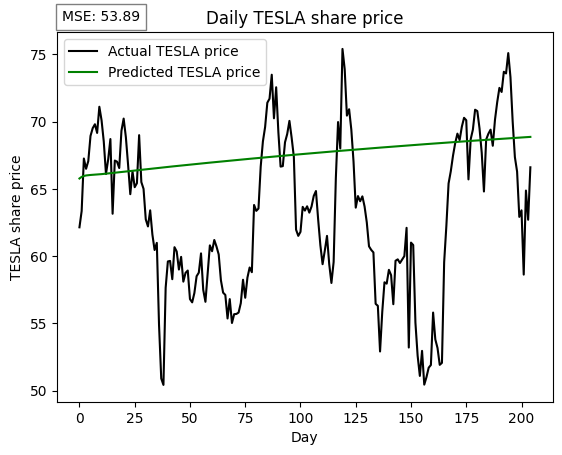

In [34]:
from sklearn.metrics import mean_squared_error

# Calculate Mean Squared Error (MSE) between the actual prices and the predicted prices
mse = mean_squared_error(actual_prices, All_predicted_prices)
print("Mean Squared Error:", mse)

#Plot the Graph
COMPANY = "TESLA"
# Plot the actual prices using a black line
plt.plot(actual_prices, color='black', label=f"Actual {COMPANY} price")

# Plot the predicted prices using a green line
plt.plot(All_predicted_prices, color='green', label=f"Predicted {COMPANY} price")

# Set the title of the plot using the company name
plt.title("Daily TESLA share price")

# Set the x-axis label as 'time'
plt.xlabel("Day")

# Set the y-axis label using the company name
plt.ylabel(f"{COMPANY} share price")

plt.text(x=0.01, y=1.03, s=f"MSE: {mse:.2f}", transform=plt.gca().transAxes, 
         bbox=dict(facecolor='white', alpha=0.5))

# Display a legend to differentiate the actual and predicted prices
plt.legend()

# Show the plot on the screen
plt.show()


### Weekly

In [35]:
#train test split

#Timeframe
dataset = Weekly_Tick_data
# Prepare the data
dataset['Timestamp'] =pd.to_datetime(dataset['Timestamp'])
mask_Train = (dataset['Timestamp'] <= '2017-12-31')
mask_Test = (dataset['Timestamp'] >= '2017-12-31') & (dataset['Timestamp'] < '2018-12-31')
train = dataset.loc[mask_Train].reset_index(drop=True)
test = dataset.loc[mask_Test].reset_index(drop=True)

# Normalize train data
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(train['Close'].values.reshape(-1,1))

# Set the number of days used for prediction
#***********************
prediction_interval= len(test)

# Initialize empty lists for training data input and output
x_train = []
y_train = []

# Iterate through the scaled data, starting from the prediction_days index
for x in range(prediction_interval, len(scaled_data)):
    # Append the previous 'prediction_days' values to x_train
    x_train.append(scaled_data[x - prediction_interval:x, 0])
    # Append the current value to y_train
    y_train.append(scaled_data[x, 0])

# Convert the x_train and y_train lists to numpy arrays
x_train = np.array(x_train)
y_train = np.array(y_train)

# Reshape x_train to a 3D array with the appropriate dimensions for the LSTM model
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))

def LSTM_model():
    """
    Create and configure an LSTM model for stock price prediction.

    :return: The configured LSTM model (keras.Sequential)
    """

    # Initialize a sequential model
    model = Sequential()

    # Add the first LSTM layer with 50 units, input shape, and return sequences
    model.add(LSTM(units=50, return_sequences=True, input_shape=(x_train.shape[1], 1)))
    # Add dropout to prevent overfitting
    model.add(Dropout(0.2))

    # Add a second LSTM layer with 50 units and return sequences
    model.add(LSTM(units=50, return_sequences=True))
    # Add dropout to prevent overfitting
    model.add(Dropout(0.2))

    # Add a third LSTM layer with 50 units
    model.add(LSTM(units=50))
    # Add dropout to prevent overfitting
    model.add(Dropout(0.2))

    # Add a dense output layer with one unit
    model.add(Dense(units=1))

    return model

model = LSTM_model()
model.summary()
model.compile(
    optimizer='adam',
    loss='mean_squared_error'
)

# Define callbacks

# Save weights only for best model
checkpointer = ModelCheckpoint(
    filepath = '/Users/shenglienlee/Desktop/Work/2023_Fall/Deep_Learning/Project_3/Model',
    filename='{epoch}-{val_loss:.2f}-{other_metric:.2f}',
    verbose = 2,
    save_best_only = True
)

model.fit(
    x_train,
    y_train,
    epochs=25,
    batch_size = 32,
    callbacks = [checkpointer]
)

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_9 (LSTM)               (None, 53, 50)            10400     
                                                                 
 dropout_9 (Dropout)         (None, 53, 50)            0         
                                                                 
 lstm_10 (LSTM)              (None, 53, 50)            20200     
                                                                 
 dropout_10 (Dropout)        (None, 53, 50)            0         
                                                                 
 lstm_11 (LSTM)              (None, 50)                20200     
                                                                 
 dropout_11 (Dropout)        (None, 50)                0         
                                                                 
 dense_3 (Dense)             (None, 1)                

In [36]:
#train test split

#Timeframe
dataset = Weekly_Tick_data
# Prepare the data
dataset['Timestamp'] =pd.to_datetime(dataset['Timestamp'])
mask_Train = (dataset['Timestamp'] <= '2017-12-31')
mask_Test = (dataset['Timestamp'] >= '2017-12-31') & (dataset['Timestamp'] < '2018-12-31')
train = dataset.loc[mask_Train].reset_index(drop=True)
test = dataset.loc[mask_Test].reset_index(drop=True)

In [37]:
# Extract the actual closing prices from the test data
actual_prices = test['Close'].values
# Initialize an empty list for test data input
x_test = []

# # Iterate through the model inputs, starting from the prediction_days index
# for x in range(prediction_interval, len(model_inputs)):
#     # Append the previous 'prediction_days' values to x_test
#     x_test.append(model_inputs[x-prediction_interval:x, 0])

#x_test is a numpy array with shape 60*1
#initail x_test shoould be last 60 smaple in training dataset
x_test = x_train[-1]
# Convert the x_test list to a numpy array
x_test = np.array(x_test)
# Reshape x_test to a 3D array with the appropriate dimensions for the LSTM model
x_test = np.reshape(x_test, (1, x_test.shape[0], 1))

All_predicted_prices = []
#predict a value
for i in range(len(test)):
    predicted_price = model.predict(x_test)
    #x_test = x_test delete first element +predicted_prices
    #       shift all the data one ahead
    #       add  predicted_prices as last value
    x_test =x_test[:, 1:, :]
    # Generate price predictions using the LSTM model
    predicted_price = np.array([[[predicted_price[0][0]]]])
    x_test = np.append(x_test, predicted_price, axis=1)
    All_predicted_prices.append(predicted_price)

# Invert the scaling applied to the predicted prices to obtain actual values
All_predicted_prices = np.array(All_predicted_prices)
All_predicted_prices = All_predicted_prices.reshape(All_predicted_prices.shape[0],1)
All_predicted_prices = scaler.inverse_transform(All_predicted_prices)



1/1 [==============================] - 0s 12ms/step


Mean Squared Error: 68.03946244259166


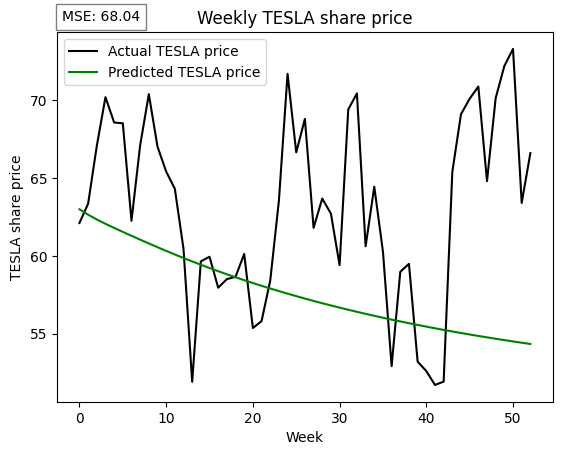

In [38]:
from sklearn.metrics import mean_squared_error

# Calculate Mean Squared Error (MSE) between the actual prices and the predicted prices
mse = mean_squared_error(actual_prices, All_predicted_prices)
print("Mean Squared Error:", mse)

#Plot the Graph
COMPANY = "TESLA"
# Plot the actual prices using a black line
plt.plot(actual_prices, color='black', label=f"Actual {COMPANY} price")

# Plot the predicted prices using a green line
plt.plot(All_predicted_prices, color='green', label=f"Predicted {COMPANY} price")

# Set the title of the plot using the company name
plt.title("Weekly TESLA share price")

# Set the x-axis label as 'time'
plt.xlabel("Week")

# Set the y-axis label using the company name
plt.ylabel(f"{COMPANY} share price")

plt.text(x=0.01, y=1.03, s=f"MSE: {mse:.2f}", transform=plt.gca().transAxes, 
         bbox=dict(facecolor='white', alpha=0.5))

# Display a legend to differentiate the actual and predicted prices
plt.legend()

# Show the plot on the screen
plt.show()


In [39]:
Monthly_Tick_data = Monthly_Tick_data[['Timestamp','net_sentiment','num_of_likes','Close']]

### Monthly

In [41]:
#train test split

#Timeframe
dataset = Monthly_Tick_data
# Prepare the data
dataset['Timestamp'] =pd.to_datetime(dataset['Timestamp'])
mask_Train = (dataset['Timestamp'] <= '2017-12-31')
mask_Test = (dataset['Timestamp'] >= '2017-12-31') & (dataset['Timestamp'] < '2018-12-31')
train = dataset.loc[mask_Train].reset_index(drop=True)
test = dataset.loc[mask_Test].reset_index(drop=True)

# Normalize train data
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(train['Close'].values.reshape(-1,1))

# Set the number of days used for prediction
#***********************
prediction_interval= len(test)

# Initialize empty lists for training data input and output
x_train = []
y_train = []

# Iterate through the scaled data, starting from the prediction_days index
for x in range(prediction_interval, len(scaled_data)):
    # Append the previous 'prediction_days' values to x_train
    x_train.append(scaled_data[x - prediction_interval:x, 0])
    # Append the current value to y_train
    y_train.append(scaled_data[x, 0])

# Convert the x_train and y_train lists to numpy arrays
x_train = np.array(x_train)
y_train = np.array(y_train)

# Reshape x_train to a 3D array with the appropriate dimensions for the LSTM model
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))

def LSTM_model():
    """
    Create and configure an LSTM model for stock price prediction.

    :return: The configured LSTM model (keras.Sequential)
    """

    # Initialize a sequential model
    model = Sequential()

    # Add the first LSTM layer with 50 units, input shape, and return sequences
    model.add(LSTM(units=50, return_sequences=True, input_shape=(x_train.shape[1], 1)))
    # Add dropout to prevent overfitting
    model.add(Dropout(0.2))

    # Add a second LSTM layer with 50 units and return sequences
    model.add(LSTM(units=50, return_sequences=True))
    # Add dropout to prevent overfitting
    model.add(Dropout(0.2))

    # Add a third LSTM layer with 50 units
    model.add(LSTM(units=50))
    # Add dropout to prevent overfitting
    model.add(Dropout(0.2))

    # Add a dense output layer with one unit
    model.add(Dense(units=1))

    return model

model = LSTM_model()
model.summary()
model.compile(
    optimizer='adam',
    loss='mean_squared_error'
)

# Define callbacks

model.fit(
    x_train,
    y_train,
    epochs=25,
    batch_size = 32
)

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_12 (LSTM)              (None, 12, 50)            10400     
                                                                 
 dropout_12 (Dropout)        (None, 12, 50)            0         
                                                                 
 lstm_13 (LSTM)              (None, 12, 50)            20200     
                                                                 
 dropout_13 (Dropout)        (None, 12, 50)            0         
                                                                 
 lstm_14 (LSTM)              (None, 50)                20200     
                                                                 
 dropout_14 (Dropout)        (None, 50)                0         
                                                                 
 dense_4 (Dense)             (None, 1)                

In [42]:
# Extract the actual closing prices from the test data
actual_prices = test['Close'].values
# Initialize an empty list for test data input
x_test = []

# # Iterate through the model inputs, starting from the prediction_days index
# for x in range(prediction_interval, len(model_inputs)):
#     # Append the previous 'prediction_days' values to x_test
#     x_test.append(model_inputs[x-prediction_interval:x, 0])

#x_test is a numpy array with shape 60*1
#initail x_test shoould be last 60 smaple in training dataset
x_test = x_train[-1]
# Convert the x_test list to a numpy array
x_test = np.array(x_test)
# Reshape x_test to a 3D array with the appropriate dimensions for the LSTM model
x_test = np.reshape(x_test, (1, x_test.shape[0], 1))

All_predicted_prices = []
#predict a value
for i in range(len(test)):
    predicted_price = model.predict(x_test)
    #x_test = x_test delete first element +predicted_prices
    #       shift all the data one ahead
    #       add  predicted_prices as last value
    x_test =x_test[:, 1:, :]
    # Generate price predictions using the LSTM model
    predicted_price = np.array([[[predicted_price[0][0]]]])
    x_test = np.append(x_test, predicted_price, axis=1)
    All_predicted_prices.append(predicted_price)

# Invert the scaling applied to the predicted prices to obtain actual values
All_predicted_prices = np.array(All_predicted_prices)
All_predicted_prices = All_predicted_prices.reshape(All_predicted_prices.shape[0],1)
All_predicted_prices = scaler.inverse_transform(All_predicted_prices)



1/1 [==============================] - 0s 9ms/step


Mean Squared Error: 48.03398051387816


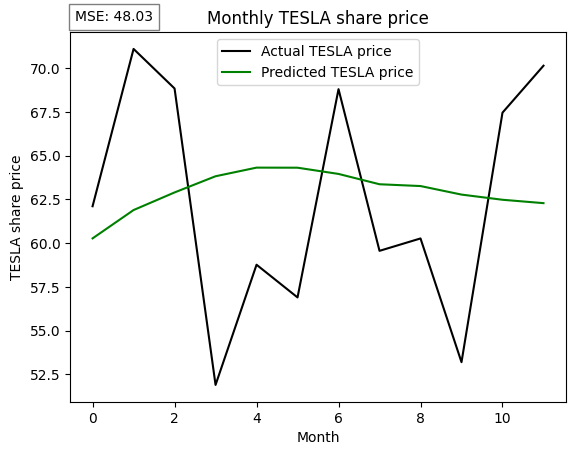

In [43]:
from sklearn.metrics import mean_squared_error

# Calculate Mean Squared Error (MSE) between the actual prices and the predicted prices
mse = mean_squared_error(actual_prices, All_predicted_prices)
print("Mean Squared Error:", mse)
#Plot the Graph
COMPANY = "TESLA"
# Plot the actual prices using a black line
plt.plot(actual_prices, color='black', label=f"Actual {COMPANY} price")

# Plot the predicted prices using a green line
plt.plot(All_predicted_prices, color='green', label=f"Predicted {COMPANY} price")

# Set the title of the plot using the company name
plt.title("Monthly TESLA share price")

# Set the x-axis label as 'time'
plt.xlabel("Month")

# Set the y-axis label using the company name
plt.ylabel(f"{COMPANY} share price")

plt.text(x=0.01, y=1.03, s=f"MSE: {mse:.2f}", transform=plt.gca().transAxes, 
         bbox=dict(facecolor='white', alpha=0.5))

# Display a legend to differentiate the actual and predicted prices
plt.legend()

# Show the plot on the screen
plt.show()




# LSTM With Tweet-related Feature

In [60]:
#Read data
data_30min = pd.read_csv('combined_30min_df.csv')
data_hourly = pd.read_csv('combined_hourly_df.csv')
data_daily = pd.read_csv('combined_daily_df.csv')
data_weekly = pd.read_csv('combined_weekly_df.csv')
data_monthly = pd.read_csv('combined_monthly_df.csv')

## 30 Minutes

In [61]:
#train test split

column_use = ['30min_truncated_datetime', 'num_of_likes', 'net_sentiment', 'Close']
data_30min = data_30min[column_use]

#Timeframe
dataset = data_30min
# Prepare the data
dataset['Timestamp'] =pd.to_datetime(dataset['30min_truncated_datetime'])
mask_Train = (dataset['Timestamp'] <= '2017-12-31')
mask_Test = (dataset['Timestamp'] >= '2017-12-31') & (dataset['Timestamp'] < '2018-12-31')
train = dataset.loc[mask_Train].reset_index(drop=True)
test = dataset.loc[mask_Test].reset_index(drop=True)

# Normalize train data
# Scaler for 'Close' prices
scaler_close = MinMaxScaler(feature_range=(0, 1))
scaled_close_train = scaler_close.fit_transform(train['Close'].values.reshape(-1, 1))

# Scaler for other features
scaler_features = MinMaxScaler(feature_range=(0, 1))
scaled_features_train = scaler_features.fit_transform(train[['num_of_likes', 'net_sentiment']])

scaled_train = np.hstack((scaled_close_train, scaled_features_train))


# Set the number of days used for prediction
#***********************
prediction_interval= len(test)

# Initialize empty lists for training data input and output
x_train = []
y_train = []

# Iterate through the scaled data, starting from the prediction_days index
for x in range(prediction_interval, len(scaled_train)):
    # Append the previous 'prediction_days' values to x_train
    x_train.append(scaled_train[x - prediction_interval:x, 0])
    # Append the current value to y_train
    y_train.append(scaled_train[x, 0])

# Convert the x_train and y_train lists to numpy arrays
x_train = np.array(x_train)
y_train = np.array(y_train)

# Reshape x_train to a 3D array with the appropriate dimensions for the LSTM model
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))

def LSTM_model():
    """
    Create and configure an LSTM model for stock price prediction.

    :return: The configured LSTM model (keras.Sequential)
    """

    # Initialize a sequential model
    model = Sequential()

    # Add the first LSTM layer with 50 units, input shape, and return sequences
    model.add(LSTM(units=50, return_sequences=True, input_shape=(x_train.shape[1], 1)))
    # Add dropout to prevent overfitting
    model.add(Dropout(0.2))

    # Add a second LSTM layer with 50 units and return sequences
    model.add(LSTM(units=50, return_sequences=True))
    # Add dropout to prevent overfitting
    model.add(Dropout(0.2))

    # Add a third LSTM layer with 50 units
    model.add(LSTM(units=50))
    # Add dropout to prevent overfitting
    model.add(Dropout(0.2))

    # Add a dense output layer with one unit
    model.add(Dense(units=1))

    return model

model = LSTM_model()
model.summary()
model.compile(
    optimizer='adam',
    loss='mean_squared_error'
)

model.fit(
    x_train,
    y_train,
    epochs=25,
    batch_size = 32
)

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_30 (LSTM)              (None, 492, 50)           10400     
                                                                 
 dropout_30 (Dropout)        (None, 492, 50)           0         
                                                                 
 lstm_31 (LSTM)              (None, 492, 50)           20200     
                                                                 
 dropout_31 (Dropout)        (None, 492, 50)           0         
                                                                 
 lstm_32 (LSTM)              (None, 50)                20200     
                                                                 
 dropout_32 (Dropout)        (None, 50)                0         
                                                                 
 dense_10 (Dense)            (None, 1)               

In [62]:
# Extract the actual closing prices from the test data
actual_prices = test['Close'].values
# Initialize an empty list for test data input
x_test = []

#x_test is a numpy array with shape 60*1
#initail x_test shoould be last 60 smaple in training dataset
x_test = x_train[-1]
# Convert the x_test list to a numpy array
x_test = np.array(x_test)
# Reshape x_test to a 3D array with the appropriate dimensions for the LSTM model
x_test = np.reshape(x_test, (1, x_test.shape[0], 1))

All_predicted_prices = []
#predict a value
for i in range(len(test)):
    predicted_price = model.predict(x_test)
    x_test =x_test[:, 1:, :]
    # Generate price predictions using the LSTM model
    predicted_price = np.array([[[predicted_price[0][0]]]])
    x_test = np.append(x_test, predicted_price, axis=1)
    All_predicted_prices.append(predicted_price)

# Invert the scaling applied to the predicted prices to obtain actual values
All_predicted_prices = np.array(All_predicted_prices)
All_predicted_prices = All_predicted_prices.reshape(All_predicted_prices.shape[0], 1)
All_predicted_prices = scaler_close.inverse_transform(All_predicted_prices)



1/1 [==============================] - 0s 31ms/step


Mean Squared Error: 38.158084257533


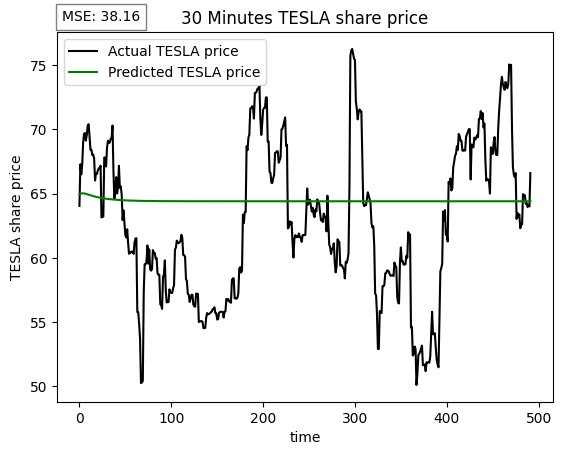

In [63]:
from sklearn.metrics import mean_squared_error

# Calculate Mean Squared Error (MSE) between the actual prices and the predicted prices
mse = mean_squared_error(actual_prices, All_predicted_prices)
print("Mean Squared Error:", mse)

#Plot the Graph
COMPANY = "TESLA"
# Plot the actual prices using a black line
plt.plot(actual_prices, color='black', label=f"Actual {COMPANY} price")

# Plot the predicted prices using a green line
plt.plot(All_predicted_prices, color='green', label=f"Predicted {COMPANY} price")

# Set the title of the plot using the company name
plt.title("30 Minutes TESLA share price")

# Set the x-axis label as 'time'
plt.xlabel("time")

# Set the y-axis label using the company name
plt.ylabel(f"{COMPANY} share price")

plt.text(x=0.01, y=1.03, s=f"MSE: {mse:.2f}", transform=plt.gca().transAxes, 
         bbox=dict(facecolor='white', alpha=0.5))

# Display a legend to differentiate the actual and predicted prices
plt.legend()

# Show the plot on the screen
plt.show()


## Hourly

In [48]:
#train test split

column_use = ['hourly_truncated_datetime', 'num_of_likes', 'net_sentiment', 'Close']
data_hourly = data_hourly[column_use]

#Timeframe
dataset = data_hourly
# Prepare the data
dataset['Timestamp'] =pd.to_datetime(dataset['hourly_truncated_datetime'])
mask_Train = (dataset['Timestamp'] <= '2017-12-31')
mask_Test = (dataset['Timestamp'] >= '2017-12-31') & (dataset['Timestamp'] < '2018-12-31')
train = dataset.loc[mask_Train].reset_index(drop=True)
test = dataset.loc[mask_Test].reset_index(drop=True)

# Normalize train data
# Scaler for 'Close' prices
scaler_close = MinMaxScaler(feature_range=(0, 1))
scaled_close_train = scaler_close.fit_transform(train['Close'].values.reshape(-1, 1))

# Scaler for other features
scaler_features = MinMaxScaler(feature_range=(0, 1))
scaled_features_train = scaler_features.fit_transform(train[['num_of_likes', 'net_sentiment']])

scaled_train = np.hstack((scaled_close_train, scaled_features_train))


# Set the number of days used for prediction
#***********************
prediction_interval= len(test)

# Initialize empty lists for training data input and output
x_train = []
y_train = []

# Iterate through the scaled data, starting from the prediction_days index
for x in range(prediction_interval, len(scaled_train)):
    # Append the previous 'prediction_days' values to x_train
    x_train.append(scaled_train[x - prediction_interval:x, 0])
    # Append the current value to y_train
    y_train.append(scaled_train[x, 0])

# Convert the x_train and y_train lists to numpy arrays
x_train = np.array(x_train)
y_train = np.array(y_train)

# Reshape x_train to a 3D array with the appropriate dimensions for the LSTM model
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))

def LSTM_model():
    """
    Create and configure an LSTM model for stock price prediction.

    :return: The configured LSTM model (keras.Sequential)
    """

    # Initialize a sequential model
    model = Sequential()

    # Add the first LSTM layer with 50 units, input shape, and return sequences
    model.add(LSTM(units=50, return_sequences=True, input_shape=(x_train.shape[1], 1)))
    # Add dropout to prevent overfitting
    model.add(Dropout(0.2))

    # Add a second LSTM layer with 50 units and return sequences
    model.add(LSTM(units=50, return_sequences=True))
    # Add dropout to prevent overfitting
    model.add(Dropout(0.2))

    # Add a third LSTM layer with 50 units
    model.add(LSTM(units=50))
    # Add dropout to prevent overfitting
    model.add(Dropout(0.2))

    # Add a dense output layer with one unit
    model.add(Dense(units=1))

    return model

model = LSTM_model()
model.summary()
model.compile(
    optimizer='adam',
    loss='mean_squared_error'
)

model.fit(
    x_train,
    y_train,
    epochs=25,
    batch_size = 32
)

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_18 (LSTM)              (None, 423, 50)           10400     
                                                                 
 dropout_18 (Dropout)        (None, 423, 50)           0         
                                                                 
 lstm_19 (LSTM)              (None, 423, 50)           20200     
                                                                 
 dropout_19 (Dropout)        (None, 423, 50)           0         
                                                                 
 lstm_20 (LSTM)              (None, 50)                20200     
                                                                 
 dropout_20 (Dropout)        (None, 50)                0         
                                                                 
 dense_6 (Dense)             (None, 1)                

In [49]:
# Extract the actual closing prices from the test data
actual_prices = test['Close'].values
# Initialize an empty list for test data input
x_test = []

#x_test is a numpy array with shape 60*1
#initail x_test shoould be last 60 smaple in training dataset
x_test = x_train[-1]
# Convert the x_test list to a numpy array
x_test = np.array(x_test)
# Reshape x_test to a 3D array with the appropriate dimensions for the LSTM model
x_test = np.reshape(x_test, (1, x_test.shape[0], 1))

All_predicted_prices = []
#predict a value
for i in range(len(test)):
    predicted_price = model.predict(x_test)
    x_test =x_test[:, 1:, :]
    # Generate price predictions using the LSTM model
    predicted_price = np.array([[[predicted_price[0][0]]]])
    x_test = np.append(x_test, predicted_price, axis=1)
    All_predicted_prices.append(predicted_price)

# Invert the scaling applied to the predicted prices to obtain actual values
All_predicted_prices = np.array(All_predicted_prices)
All_predicted_prices = All_predicted_prices.reshape(All_predicted_prices.shape[0], 1)
All_predicted_prices = scaler_close.inverse_transform(All_predicted_prices)



1/1 [==============================] - 0s 28ms/step


Mean Squared Error: 53.63356949532555


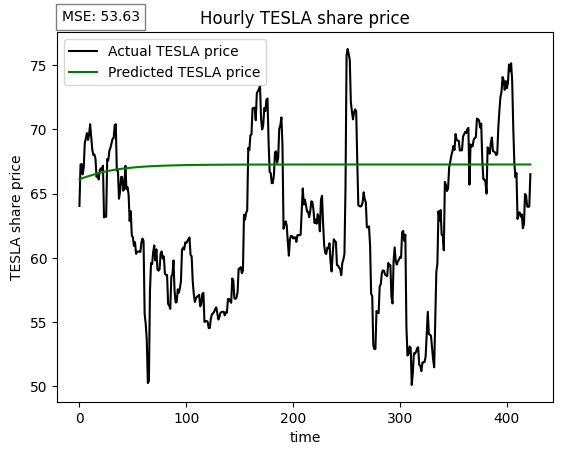

In [50]:
from sklearn.metrics import mean_squared_error

# Calculate Mean Squared Error (MSE) between the actual prices and the predicted prices
mse = mean_squared_error(actual_prices, All_predicted_prices)
print("Mean Squared Error:", mse)

#Plot the Graph
COMPANY = "TESLA"
# Plot the actual prices using a black line
plt.plot(actual_prices, color='black', label=f"Actual {COMPANY} price")

# Plot the predicted prices using a green line
plt.plot(All_predicted_prices, color='green', label=f"Predicted {COMPANY} price")

# Set the title of the plot using the company name
plt.title("Hourly TESLA share price")

# Set the x-axis label as 'time'
plt.xlabel("time")

# Set the y-axis label using the company name
plt.ylabel(f"{COMPANY} share price")

plt.text(x=0.01, y=1.03, s=f"MSE: {mse:.2f}", transform=plt.gca().transAxes, 
         bbox=dict(facecolor='white', alpha=0.5))

# Display a legend to differentiate the actual and predicted prices
plt.legend()

# Show the plot on the screen
plt.show()


## Daily

In [51]:
#train test split

column_use = ['date', 'num_of_likes', 'net_sentiment', 'Close']
data_daily = data_daily[column_use]

#Timeframe
dataset = data_daily
# Prepare the data
dataset['Timestamp'] =pd.to_datetime(dataset['date'])
mask_Train = (dataset['Timestamp'] <= '2017-12-31')
mask_Test = (dataset['Timestamp'] >= '2017-12-31') & (dataset['Timestamp'] < '2018-12-31')
train = dataset.loc[mask_Train].reset_index(drop=True)
test = dataset.loc[mask_Test].reset_index(drop=True)

# Normalize train data
# Scaler for 'Close' prices
scaler_close = MinMaxScaler(feature_range=(0, 1))
scaled_close_train = scaler_close.fit_transform(train['Close'].values.reshape(-1, 1))

# Scaler for other features
scaler_features = MinMaxScaler(feature_range=(0, 1))
scaled_features_train = scaler_features.fit_transform(train[['num_of_likes', 'net_sentiment']])

scaled_train = np.hstack((scaled_close_train, scaled_features_train))


# Set the number of days used for prediction
#***********************
prediction_interval= len(test)

# Initialize empty lists for training data input and output
x_train = []
y_train = []

# Iterate through the scaled data, starting from the prediction_days index
for x in range(prediction_interval, len(scaled_train)):
    # Append the previous 'prediction_days' values to x_train
    x_train.append(scaled_train[x - prediction_interval:x, 0])
    # Append the current value to y_train
    y_train.append(scaled_train[x, 0])

# Convert the x_train and y_train lists to numpy arrays
x_train = np.array(x_train)
y_train = np.array(y_train)

# Reshape x_train to a 3D array with the appropriate dimensions for the LSTM model
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))

def LSTM_model():
    """
    Create and configure an LSTM model for stock price prediction.

    :return: The configured LSTM model (keras.Sequential)
    """

    # Initialize a sequential model
    model = Sequential()

    # Add the first LSTM layer with 50 units, input shape, and return sequences
    model.add(LSTM(units=50, return_sequences=True, input_shape=(x_train.shape[1], 1)))
    # Add dropout to prevent overfitting
    model.add(Dropout(0.2))

    # Add a second LSTM layer with 50 units and return sequences
    model.add(LSTM(units=50, return_sequences=True))
    # Add dropout to prevent overfitting
    model.add(Dropout(0.2))

    # Add a third LSTM layer with 50 units
    model.add(LSTM(units=50))
    # Add dropout to prevent overfitting
    model.add(Dropout(0.2))

    # Add a dense output layer with one unit
    model.add(Dense(units=1))

    return model

model = LSTM_model()
model.summary()
model.compile(
    optimizer='adam',
    loss='mean_squared_error'
)

model.fit(
    x_train,
    y_train,
    epochs=25,
    batch_size = 32
)

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_21 (LSTM)              (None, 205, 50)           10400     
                                                                 
 dropout_21 (Dropout)        (None, 205, 50)           0         
                                                                 
 lstm_22 (LSTM)              (None, 205, 50)           20200     
                                                                 
 dropout_22 (Dropout)        (None, 205, 50)           0         
                                                                 
 lstm_23 (LSTM)              (None, 50)                20200     
                                                                 
 dropout_23 (Dropout)        (None, 50)                0         
                                                                 
 dense_7 (Dense)             (None, 1)                

In [52]:
# Extract the actual closing prices from the test data
actual_prices = test['Close'].values
# Initialize an empty list for test data input
x_test = []

#x_test is a numpy array with shape 60*1
#initail x_test shoould be last 60 smaple in training dataset
x_test = x_train[-1]
# Convert the x_test list to a numpy array
x_test = np.array(x_test)
# Reshape x_test to a 3D array with the appropriate dimensions for the LSTM model
x_test = np.reshape(x_test, (1, x_test.shape[0], 1))

All_predicted_prices = []
#predict a value
for i in range(len(test)):
    predicted_price = model.predict(x_test)
    x_test =x_test[:, 1:, :]
    # Generate price predictions using the LSTM model
    predicted_price = np.array([[[predicted_price[0][0]]]])
    x_test = np.append(x_test, predicted_price, axis=1)
    All_predicted_prices.append(predicted_price)

# Invert the scaling applied to the predicted prices to obtain actual values
All_predicted_prices = np.array(All_predicted_prices)
All_predicted_prices = All_predicted_prices.reshape(All_predicted_prices.shape[0], 1)
All_predicted_prices = scaler_close.inverse_transform(All_predicted_prices)



1/1 [==============================] - 0s 18ms/step


Mean Squared Error: 85.69158911024054


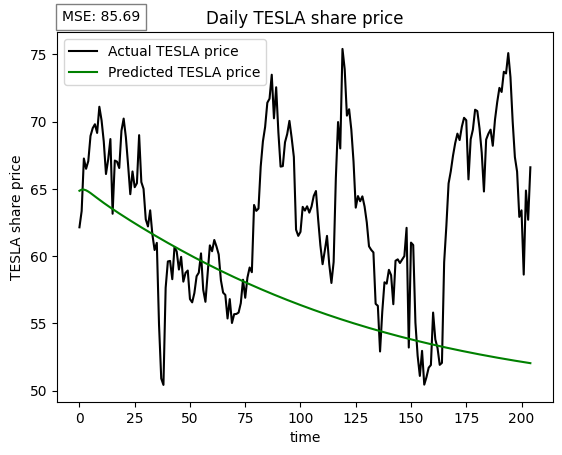

In [53]:
from sklearn.metrics import mean_squared_error

# Calculate Mean Squared Error (MSE) between the actual prices and the predicted prices
mse = mean_squared_error(actual_prices, All_predicted_prices)
print("Mean Squared Error:", mse)

#Plot the Graph
COMPANY = "TESLA"
# Plot the actual prices using a black line
plt.plot(actual_prices, color='black', label=f"Actual {COMPANY} price")

# Plot the predicted prices using a green line
plt.plot(All_predicted_prices, color='green', label=f"Predicted {COMPANY} price")

# Set the title of the plot using the company name
plt.title("Daily TESLA share price")

# Set the x-axis label as 'time'
plt.xlabel("time")

# Set the y-axis label using the company name
plt.ylabel(f"{COMPANY} share price")

plt.text(x=0.01, y=1.03, s=f"MSE: {mse:.2f}", transform=plt.gca().transAxes, 
         bbox=dict(facecolor='white', alpha=0.5))

# Display a legend to differentiate the actual and predicted prices
plt.legend()

# Show the plot on the screen
plt.show()


## Weekly

In [54]:
#train test split

column_use = ['week_start_date', 'num_of_likes', 'net_sentiment', 'Close']
data_weekly = data_weekly[column_use]

#Timeframe
dataset = data_weekly
# Prepare the data
dataset['Timestamp'] =pd.to_datetime(dataset['week_start_date'])
mask_Train = (dataset['Timestamp'] <= '2017-12-31')
mask_Test = (dataset['Timestamp'] >= '2017-12-31') & (dataset['Timestamp'] < '2018-12-31')
train = dataset.loc[mask_Train].reset_index(drop=True)
test = dataset.loc[mask_Test].reset_index(drop=True)

# Normalize train data
# Scaler for 'Close' prices
scaler_close = MinMaxScaler(feature_range=(0, 1))
scaled_close_train = scaler_close.fit_transform(train['Close'].values.reshape(-1, 1))

# Scaler for other features
scaler_features = MinMaxScaler(feature_range=(0, 1))
scaled_features_train = scaler_features.fit_transform(train[['num_of_likes', 'net_sentiment']])

scaled_train = np.hstack((scaled_close_train, scaled_features_train))


# Set the number of days used for prediction
#***********************
prediction_interval= len(test)

# Initialize empty lists for training data input and output
x_train = []
y_train = []

# Iterate through the scaled data, starting from the prediction_days index
for x in range(prediction_interval, len(scaled_train)):
    # Append the previous 'prediction_days' values to x_train
    x_train.append(scaled_train[x - prediction_interval:x, 0])
    # Append the current value to y_train
    y_train.append(scaled_train[x, 0])

# Convert the x_train and y_train lists to numpy arrays
x_train = np.array(x_train)
y_train = np.array(y_train)

# Reshape x_train to a 3D array with the appropriate dimensions for the LSTM model
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))

def LSTM_model():
    """
    Create and configure an LSTM model for stock price prediction.

    :return: The configured LSTM model (keras.Sequential)
    """

    # Initialize a sequential model
    model = Sequential()

    # Add the first LSTM layer with 50 units, input shape, and return sequences
    model.add(LSTM(units=50, return_sequences=True, input_shape=(x_train.shape[1], 1)))
    # Add dropout to prevent overfitting
    model.add(Dropout(0.2))

    # Add a second LSTM layer with 50 units and return sequences
    model.add(LSTM(units=50, return_sequences=True))
    # Add dropout to prevent overfitting
    model.add(Dropout(0.2))

    # Add a third LSTM layer with 50 units
    model.add(LSTM(units=50))
    # Add dropout to prevent overfitting
    model.add(Dropout(0.2))

    # Add a dense output layer with one unit
    model.add(Dense(units=1))

    return model

model = LSTM_model()
model.summary()
model.compile(
    optimizer='adam',
    loss='mean_squared_error'
)

model.fit(
    x_train,
    y_train,
    epochs=25,
    batch_size = 32
)

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_24 (LSTM)              (None, 53, 50)            10400     
                                                                 
 dropout_24 (Dropout)        (None, 53, 50)            0         
                                                                 
 lstm_25 (LSTM)              (None, 53, 50)            20200     
                                                                 
 dropout_25 (Dropout)        (None, 53, 50)            0         
                                                                 
 lstm_26 (LSTM)              (None, 50)                20200     
                                                                 
 dropout_26 (Dropout)        (None, 50)                0         
                                                                 
 dense_8 (Dense)             (None, 1)                

In [55]:
# Extract the actual closing prices from the test data
actual_prices = test['Close'].values
# Initialize an empty list for test data input
x_test = []

#x_test is a numpy array with shape 60*1
#initail x_test shoould be last 60 smaple in training dataset
x_test = x_train[-1]
# Convert the x_test list to a numpy array
x_test = np.array(x_test)
# Reshape x_test to a 3D array with the appropriate dimensions for the LSTM model
x_test = np.reshape(x_test, (1, x_test.shape[0], 1))

All_predicted_prices = []
#predict a value
for i in range(len(test)):
    predicted_price = model.predict(x_test)
    x_test =x_test[:, 1:, :]
    # Generate price predictions using the LSTM model
    predicted_price = np.array([[[predicted_price[0][0]]]])
    x_test = np.append(x_test, predicted_price, axis=1)
    All_predicted_prices.append(predicted_price)

# Invert the scaling applied to the predicted prices to obtain actual values
All_predicted_prices = np.array(All_predicted_prices)
All_predicted_prices = All_predicted_prices.reshape(All_predicted_prices.shape[0], 1)
All_predicted_prices = scaler_close.inverse_transform(All_predicted_prices)



1/1 [==============================] - 0s 12ms/step


Mean Squared Error: 39.425417533962005


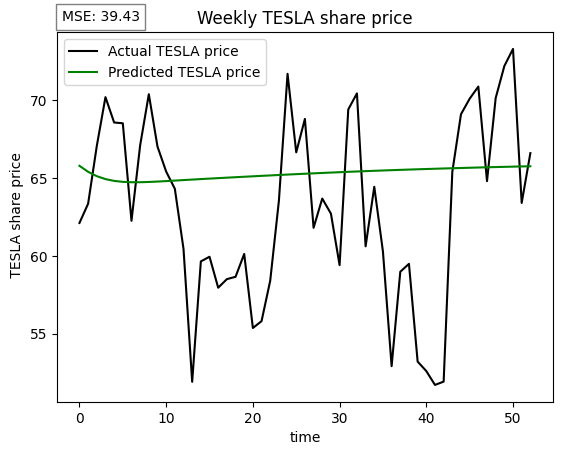

In [56]:
from sklearn.metrics import mean_squared_error

# Calculate Mean Squared Error (MSE) between the actual prices and the predicted prices
mse = mean_squared_error(actual_prices, All_predicted_prices)
print("Mean Squared Error:", mse)

#Plot the Graph
COMPANY = "TESLA"
# Plot the actual prices using a black line
plt.plot(actual_prices, color='black', label=f"Actual {COMPANY} price")

# Plot the predicted prices using a green line
plt.plot(All_predicted_prices, color='green', label=f"Predicted {COMPANY} price")

# Set the title of the plot using the company name
plt.title("Weekly TESLA share price")

# Set the x-axis label as 'time'
plt.xlabel("time")

# Set the y-axis label using the company name
plt.ylabel(" TESLA share price")

plt.text(x=0.01, y=1.03, s=f"MSE: {mse:.2f}", transform=plt.gca().transAxes, 
         bbox=dict(facecolor='white', alpha=0.5))

# Display a legend to differentiate the actual and predicted prices
plt.legend()

# Show the plot on the screen
plt.show()


## Monthly

In [57]:
#train test split

column_use = ['month_end_date', 'num_of_likes', 'net_sentiment', 'Close']
data_monthly = data_monthly[column_use]

#Timeframe
dataset = data_monthly
# Prepare the data
dataset['Timestamp'] =pd.to_datetime(dataset['month_end_date'])
mask_Train = (dataset['Timestamp'] <= '2017-12-31')
mask_Test = (dataset['Timestamp'] >= '2017-12-31') & (dataset['Timestamp'] < '2018-12-31')
train = dataset.loc[mask_Train].reset_index(drop=True)
test = dataset.loc[mask_Test].reset_index(drop=True)

# Normalize train data
# Scaler for 'Close' prices
scaler_close = MinMaxScaler(feature_range=(0, 1))
scaled_close_train = scaler_close.fit_transform(train['Close'].values.reshape(-1, 1))

# Scaler for other features
scaler_features = MinMaxScaler(feature_range=(0, 1))
scaled_features_train = scaler_features.fit_transform(train[['num_of_likes', 'net_sentiment']])

scaled_train = np.hstack((scaled_close_train, scaled_features_train))


# Set the number of days used for prediction
#***********************
prediction_interval= len(test)

# Initialize empty lists for training data input and output
x_train = []
y_train = []

# Iterate through the scaled data, starting from the prediction_days index
for x in range(prediction_interval, len(scaled_train)):
    # Append the previous 'prediction_days' values to x_train
    x_train.append(scaled_train[x - prediction_interval:x, 0])
    # Append the current value to y_train
    y_train.append(scaled_train[x, 0])

# Convert the x_train and y_train lists to numpy arrays
x_train = np.array(x_train)
y_train = np.array(y_train)

# Reshape x_train to a 3D array with the appropriate dimensions for the LSTM model
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))

def LSTM_model():
    """
    Create and configure an LSTM model for stock price prediction.

    :return: The configured LSTM model (keras.Sequential)
    """

    # Initialize a sequential model
    model = Sequential()

    # Add the first LSTM layer with 50 units, input shape, and return sequences
    model.add(LSTM(units=50, return_sequences=True, input_shape=(x_train.shape[1], 1)))
    # Add dropout to prevent overfitting
    model.add(Dropout(0.2))

    # Add a second LSTM layer with 50 units and return sequences
    model.add(LSTM(units=50, return_sequences=True))
    # Add dropout to prevent overfitting
    model.add(Dropout(0.2))

    # Add a third LSTM layer with 50 units
    model.add(LSTM(units=50))
    # Add dropout to prevent overfitting
    model.add(Dropout(0.2))

    # Add a dense output layer with one unit
    model.add(Dense(units=1))

    return model

model = LSTM_model()
model.summary()
model.compile(
    optimizer='adam',
    loss='mean_squared_error'
)

model.fit(
    x_train,
    y_train,
    epochs=25,
    batch_size = 32
)

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_27 (LSTM)              (None, 12, 50)            10400     
                                                                 
 dropout_27 (Dropout)        (None, 12, 50)            0         
                                                                 
 lstm_28 (LSTM)              (None, 12, 50)            20200     
                                                                 
 dropout_28 (Dropout)        (None, 12, 50)            0         
                                                                 
 lstm_29 (LSTM)              (None, 50)                20200     
                                                                 
 dropout_29 (Dropout)        (None, 50)                0         
                                                                 
 dense_9 (Dense)             (None, 1)                

In [58]:
# Extract the actual closing prices from the test data
actual_prices = test['Close'].values
# Initialize an empty list for test data input
x_test = []

#x_test is a numpy array with shape 60*1
#initail x_test shoould be last 60 smaple in training dataset
x_test = x_train[-1]
# Convert the x_test list to a numpy array
x_test = np.array(x_test)
# Reshape x_test to a 3D array with the appropriate dimensions for the LSTM model
x_test = np.reshape(x_test, (1, x_test.shape[0], 1))

All_predicted_prices = []
#predict a value
for i in range(len(test)):
    predicted_price = model.predict(x_test)
    x_test =x_test[:, 1:, :]
    # Generate price predictions using the LSTM model
    predicted_price = np.array([[[predicted_price[0][0]]]])
    x_test = np.append(x_test, predicted_price, axis=1)
    All_predicted_prices.append(predicted_price)

# Invert the scaling applied to the predicted prices to obtain actual values
All_predicted_prices = np.array(All_predicted_prices)
All_predicted_prices = All_predicted_prices.reshape(All_predicted_prices.shape[0], 1)
All_predicted_prices = scaler_close.inverse_transform(All_predicted_prices)



1/1 [==============================] - 0s 10ms/step


Mean Squared Error: 47.86371376596677


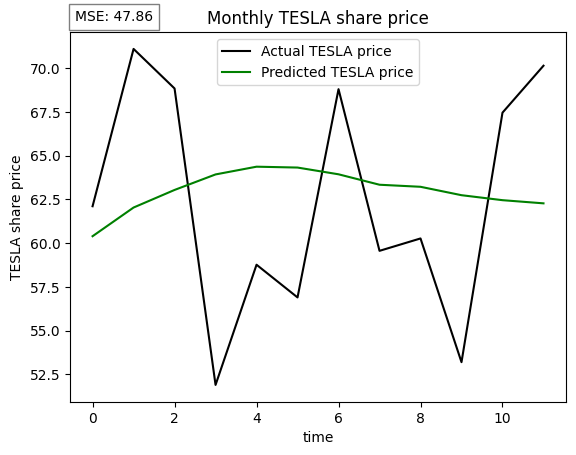

In [59]:
from sklearn.metrics import mean_squared_error

# Calculate Mean Squared Error (MSE) between the actual prices and the predicted prices
mse = mean_squared_error(actual_prices, All_predicted_prices)
print("Mean Squared Error:", mse)

#Plot the Graph
COMPANY = "TESLA"
# Plot the actual prices using a black line
plt.plot(actual_prices, color='black', label=f"Actual {COMPANY} price")

# Plot the predicted prices using a green line
plt.plot(All_predicted_prices, color='green', label=f"Predicted {COMPANY} price")

# Set the title of the plot using the company name
plt.title("Monthly TESLA share price")

# Set the x-axis label as 'time'
plt.xlabel("time")

# Set the y-axis label using the company name
plt.ylabel(f"{COMPANY} share price")

plt.text(x=0.01, y=1.03, s=f"MSE: {mse:.2f}", transform=plt.gca().transAxes, 
         bbox=dict(facecolor='white', alpha=0.5))

# Display a legend to differentiate the actual and predicted prices
plt.legend()

# Show the plot on the screen
plt.show()
